The dataset is downloaded from:
- Crime data from 2001 to present
    - https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2
- Chicago neighbourhood geojson : Export geojson and shape files
    - https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Neighborhoods/bbvz-uum9

References: 

1. Index Crimes 
http://home.chicagopolice.org/wp-content/uploads/2018/04/Definitions-IndexCrimeCategories.pdf

2. Chicago neighborhood and sides
https://en.wikipedia.org/wiki/Community_areas_in_Chicago

3. 
https://upload.wikimedia.org/wikipedia/commons/b/b3/Chicago_neighborhoods_map.png

4. 
https://github.com/pbugnion/gmaps



for geopandas:
- anaconda prompt: conda install geopandas

for gmap plot:

- anaconda prompt: conda install -c conda-forge gmaps
- anaconda prompt: jupyter nbextension enable --py gmaps
- restart : jupyter notebook

Google Map API key:
- I have removed my google map API key after running the notebook as it is confidential. 
- It needs to be replaced with your own valid google map API key if you want to draw the inline map.


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import json

Read all the crimes data from the dataset, create a "Year" column from the 'Date" column. 
As it is a long process, the new dataframe is saved into csv to use it for next time instead of recalculating it again.

uncomment it to calculate

In [2]:
#chicago_crimes_main = pd.read_csv("Crimes_-_2001_to_present_-_Map.csv")

#create Year column from Date column
#chicago_crimes_main.loc[:,'Year'] = pd.to_datetime(chicago_crimes_main['Date']).dt.year

#save into file so that no need to go through conversion again
#chicago_crimes_main.to_csv(r'chicago_crimes_dataset.csv')

Load the csv file that has the "Date" column.

In [3]:
chicago_crimes_main = pd.read_csv("chicago_crimes_dataset.csv")

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
chicago_crimes_main.head()

,Unnamed: 0,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,0,JA366925,01/01/2001 11:00:00 AM,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,412,8.0,11,NaN,NaN,2001,NaN,NaN,NaN
1,1,JB147188,10/08/2017 03:00:00 AM,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,2222,21.0,02,NaN,NaN,2017,NaN,NaN,NaN
2,2,JB147595,03/28/2017 02:00:00 PM,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,835,18.0,05,NaN,NaN,2017,NaN,NaN,NaN
3,3,JB147230,09/09/2017 08:17:00 PM,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,313,20.0,06,NaN,NaN,2017,NaN,NaN,NaN
4,4,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,122,42.0,02,NaN,NaN,2017,NaN,NaN,NaN


In [802]:
chicago_crimes_main_2019 = chicago_crimes_main[chicago_crimes_main['Year'] == 2019]
chicago_crimes_main_2019.head()

,Unnamed: 0,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
56692,56692,JC165577,02/25/2019 05:25:00 PM,047XX N WINCHESTER AVE,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,OTHER,False,False,1912,47.0,11,NaN,NaN,2019,NaN,NaN,NaN
59676,59676,JC174738,03/01/2019 02:00:00 PM,052XX W CRYSTAL ST,1152,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,OTHER,False,False,2532,37.0,11,NaN,NaN,2019,NaN,NaN,NaN
60149,60149,JC176798,01/11/2019 03:30:00 PM,029XX N LAKE SHORE DR,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,1934,44.0,11,NaN,NaN,2019,NaN,NaN,NaN
60174,60174,JC177948,02/20/2019 01:30:00 PM,005XX W WELLINGTON AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,1934,44.0,06,NaN,NaN,2019,NaN,NaN,NaN
60180,60180,JC101543,01/01/2019 10:55:00 PM,038XX N OAKLEY AVE,0880,THEFT,PURSE-SNATCHING,STREET,False,False,1921,47.0,06,NaN,NaN,2019,NaN,NaN,NaN


In [804]:
#chicago_crimes_main_2019.loc[:,'Month'] = pd.to_datetime(chicago_crimes_main_2019['Date']).dt.month
chicago_crimes_main_2019['Month'].unique()

array([ 2,  3,  1,  4,  5,  6,  8,  7, 10,  9], dtype=int64)

Checking the month data, there is data up to To use the 2019 data for comparison, 

Based on the ref1:, crimes are categorized as violent crimes and property crimes.

Prepare masks for violent crimes

In [60]:
homicide_type_mask = chicago_crimes_main['Primary Type'].str.contains('HOMICIDE')
robbery_type_mask = chicago_crimes_main['Primary Type'].str.contains('ROBBERY')

assault_type_mask = chicago_crimes_main['Primary Type'].str.contains('ASSAULT')
crime_sexual_assault_type_mask = chicago_crimes_main['Primary Type'] == 'CRIM SEXUAL ASSAULT'
involve_children_type_mask = chicago_crimes_main['Primary Type'] == 'OFFENSE INVOLVING CHILDREN'
battery_type_mask = chicago_crimes_main['Primary Type'].str.contains('BATTERY')

aggravated_mask_include_attempt = chicago_crimes_main['Description'].str.contains('NON-AGGRAVATED|SIMPLE|PRO EMP HANDS NO/MIN INJURY') == False
aggravated_mask = chicago_crimes_main['Description'].str.contains('ATTEMPT|NON-AGGRAVATED|SIMPLE|PRO EMP HANDS NO/MIN INJURY') == False

others_crime_sexual_assault_mask = chicago_crimes_main['Description'].str.contains('CRIM SEX ABUSE BY FAM MEMBER|AGG SEX ASSLT OF CHILD FAM MBR \
       |AGG CRIM SEX ABUSE FAM MEMBER|SEX ASSLT OF CHILD BY FAM MBR \
       |AGG CRIMINAL SEXUAL ABUSE|CRIMINAL SEXUAL ABUSE|SEXUAL EXPLOITATION OF A CHILD|ATT AGG CRIMINAL SEXUAL ABUSE \
       |ATT CRIM SEXUAL ABUSE \
       |ATT AGG CRIM SEXUAL ABUSE')

Prepare masks for Property crimes [Based on ref1: index crimes. Below are the property crime types]

In [61]:
arson_type_mask = chicago_crimes_main['Primary Type'].str.contains('ARSON')
burglary_type_mask = chicago_crimes_main['Primary Type'].str.contains('BURGLARY')
theft_type_mask = chicago_crimes_main['Primary Type'].str.contains('THEFT')
motor_vehicle_type_mask = chicago_crimes_main['Primary Type'].str.contains('MOTOR VEHICLE THEFT')

Prepare all the filter types for violent crimes

In [62]:
homicide_filter_data = chicago_crimes_main[homicide_type_mask]
robbery_filter_data = chicago_crimes_main[robbery_type_mask]
agg_assault_filter_data = chicago_crimes_main[assault_type_mask & ~crime_sexual_assault_type_mask & aggravated_mask]
assault_sexual_filter_data = chicago_crimes_main[crime_sexual_assault_type_mask & aggravated_mask_include_attempt]
battery_filter_data = chicago_crimes_main[battery_type_mask & aggravated_mask]

involve_children_filter_data = chicago_crimes_main[involve_children_type_mask & others_crime_sexual_assault_mask]

In [63]:
#total 6 types of violent crimes

homicide_filter_df = homicide_filter_data[['Year','Primary Type']]
robbery_filter_df = robbery_filter_data[['Year','Primary Type']]
agg_assault_filter_df = agg_assault_filter_data[['Year','Primary Type']]
assault_sexual_filter_df =assault_sexual_filter_data[['Year','Primary Type']]
involve_children_filter_df =involve_children_filter_data[['Year','Primary Type']]
battery_filter_df = battery_filter_data[['Year','Primary Type']]

Based on the ref1: Index crimes, split into two categories of crime types (violent crimes and property crimes)

Take only the aggravated crimes as violent crimes

In [64]:
violent_crime_type_list =  ['HOMICIDE','ASSAULT','ROBBERY', 'CRIM SEXUAL ASSAULT','BATTERY'] #'CRIM SEXUAL ASSAULT',
property_crime_type_list =  ['ARSON','BURGLARY','THEFT''MOTOR VEHICLE THEFT'] #'MOTOR VEHICLE THEFT'
aggravated_only_list = ['AGGRAVATED','AGGRAVATED:']

In [65]:
violent_crime_type_mask = chicago_crimes_main['Primary Type'].isin(violent_crime_type_list)

In [66]:
homicide_filter_df.loc[:,'Value']=1
robbery_filter_df.loc[:,'Value']=1
agg_assault_filter_df.loc[:,'Value']=1
assault_sexual_filter_df.loc[:,'Value']=1
involve_children_filter_df.loc[:,'Value']=1
battery_filter_df.loc[:,'Value']=1

In [67]:
violent_homicide_data =homicide_filter_df.groupby(['Primary Type', 'Year']).sum()
violent_homicide_data = violent_homicide_data.reset_index()
violent_homicide_data.head()

,Primary Type,Year,Value
0,HOMICIDE,2001,667
1,HOMICIDE,2002,657
2,HOMICIDE,2003,604
3,HOMICIDE,2004,454
4,HOMICIDE,2005,453


In [68]:
violent_robbery_data =robbery_filter_df.groupby(['Primary Type', 'Year']).sum()
violent_robbery_data = violent_robbery_data.reset_index()
violent_robbery_data.head()

,Primary Type,Year,Value
0,ROBBERY,2001,18441
1,ROBBERY,2002,18522
2,ROBBERY,2003,17332
3,ROBBERY,2004,15978
4,ROBBERY,2005,16047


In [69]:
violent_agg_assault_data =agg_assault_filter_df.groupby(['Primary Type', 'Year']).sum()
violent_agg_assault_data = violent_agg_assault_data.reset_index()
violent_agg_assault_data.head()

,Primary Type,Year,Value
0,ASSAULT,2001,7969
1,ASSAULT,2002,7827
2,ASSAULT,2003,7567
3,ASSAULT,2004,7579
4,ASSAULT,2005,7036


In [70]:
violent_assault_sexual_data =assault_sexual_filter_df.groupby(['Primary Type', 'Year']).sum()
violent_assault_sexual_data = violent_assault_sexual_data.reset_index()
violent_assault_sexual_data.head()

,Primary Type,Year,Value
0,CRIM SEXUAL ASSAULT,2001,804
1,CRIM SEXUAL ASSAULT,2002,861
2,CRIM SEXUAL ASSAULT,2003,744
3,CRIM SEXUAL ASSAULT,2004,701
4,CRIM SEXUAL ASSAULT,2005,702


In [71]:
violent_involve_children_data = involve_children_filter_df.groupby(['Primary Type', 'Year']).sum()
violent_involve_children_data = violent_involve_children_data.reset_index()
violent_involve_children_data.head()

,Primary Type,Year,Value
0,OFFENSE INVOLVING CHILDREN,2001,274
1,OFFENSE INVOLVING CHILDREN,2002,293
2,OFFENSE INVOLVING CHILDREN,2003,311
3,OFFENSE INVOLVING CHILDREN,2004,315
4,OFFENSE INVOLVING CHILDREN,2005,333


In [72]:
violent_battery_data = battery_filter_df.groupby(['Primary Type', 'Year']).sum()
violent_battery_data = violent_battery_data.reset_index()
violent_battery_data.head()

,Primary Type,Year,Value
0,BATTERY,2001,17309
1,BATTERY,2002,16274
2,BATTERY,2003,13659
3,BATTERY,2004,12650
4,BATTERY,2005,12583


In [73]:
violent_homicide_data.rename(columns={'Value':'homicide'}, inplace=True)
violent_agg_assault_data.rename(columns={'Value':'agg_assault'}, inplace=True)
violent_assault_sexual_data.rename(columns={'Value':'agg_sexual'}, inplace=True)
violent_robbery_data.rename(columns={'Value':'robbery'}, inplace=True)
violent_battery_data.rename(columns={'Value':'battery'}, inplace=True)
violent_involve_children_data.rename(columns={'Value':'offense_invole_children'}, inplace=True)

In [74]:
#start preparing for only 2 columns with violent crime and property crime
violent_crime_data_1 = violent_homicide_data[['Year','homicide']]
violent_crime_data_2 = violent_agg_assault_data[['Year','agg_assault']]
violent_crime_data_3 = violent_assault_sexual_data[['Year','agg_sexual']]
violent_crime_data_4 = violent_robbery_data[['Year','robbery']]
violent_crime_data_5 = violent_battery_data[['Year','battery']]
violent_crime_data_6 = violent_involve_children_data[['Year','offense_invole_children']]

In [75]:
all_violent_crime_data = pd.merge(violent_crime_data_1,violent_crime_data_2, on ='Year',how='inner')
all_violent_crime_data = pd.merge(all_violent_crime_data,violent_crime_data_3, on ='Year',how='inner')
all_violent_crime_data = pd.merge(all_violent_crime_data,violent_crime_data_4, on ='Year',how='inner')
all_violent_crime_data = pd.merge(all_violent_crime_data,violent_crime_data_5, on ='Year',how='inner')
all_violent_crime_data = pd.merge(all_violent_crime_data,violent_crime_data_6, on ='Year',how='inner')

In [76]:
all_violent_crime_data.head()

,Year,homicide,agg_assault,agg_sexual,robbery,battery,offense_invole_children
0,2001,667,7969,804,18441,17309,274
1,2002,657,7827,861,18522,16274,293
2,2003,604,7567,744,17332,13659,311
3,2004,454,7579,701,15978,12650,315
4,2005,453,7036,702,16047,12583,333


Create a column that combines all the violent crimes per year

In [77]:
all_violent_crime_data['sum_all_violent_crimes']=all_violent_crime_data.iloc[:,1:6].sum(axis=1)

In [78]:
all_violent_crime_data.head()

,Year,homicide,agg_assault,agg_sexual,robbery,battery,offense_invole_children,sum_all_violent_crimes
0,2001,667,7969,804,18441,17309,274,45190
1,2002,657,7827,861,18522,16274,293,44141
2,2003,604,7567,744,17332,13659,311,39906
3,2004,454,7579,701,15978,12650,315,37362
4,2005,453,7036,702,16047,12583,333,36821


Prepare masks for Property Crimes

In [83]:
arson_type_mask = chicago_crimes_main['Primary Type'].str.contains('ARSON')
burglary_type_mask = chicago_crimes_main['Primary Type'].str.contains('BURGLARY')
theft_type_mask = chicago_crimes_main['Primary Type'].str.contains('THEFT')
motor_theft_type_mask = chicago_crimes_main['Primary Type'].str.contains('MOTOR VEHICLE THEFT')

In [84]:
arson_filter_data = chicago_crimes_main[arson_type_mask]
burglary_filter_data = chicago_crimes_main[burglary_type_mask]

#do not include 'motor theft' in 'theft' as motor theft has its own filter
theft_filter_data = chicago_crimes_main[theft_type_mask & ~motor_theft_type_mask]

motor_theft_filter_data = chicago_crimes_main[motor_theft_type_mask]

In [85]:
arson_filter_df = arson_filter_data[['Year','Primary Type']]
burglary_filter_df = burglary_filter_data[['Year','Primary Type']]
theft_filter_df = theft_filter_data[['Year','Primary Type']]
motor_theft_filter_df =motor_theft_filter_data[['Year','Primary Type']]

In [86]:
arson_filter_df.loc[:,'Value']=1
burglary_filter_df.loc[:,'Value']=1
theft_filter_df.loc[:,'Value']=1
motor_theft_filter_df.loc[:,'Value']=1

In [87]:
property_arson_data = arson_filter_df.groupby(['Primary Type', 'Year']).sum()
property_arson_data = property_arson_data.reset_index()
property_arson_data.head()

,Primary Type,Year,Value
0,ARSON,2001,1010
1,ARSON,2002,1032
2,ARSON,2003,955
3,ARSON,2004,778
4,ARSON,2005,691


In [88]:
property_burglary_data = burglary_filter_df.groupby(['Primary Type', 'Year']).sum()
property_burglary_data = property_burglary_data.reset_index()
property_burglary_data.head()

,Primary Type,Year,Value
0,BURGLARY,2001,26011
1,BURGLARY,2002,25623
2,BURGLARY,2003,25156
3,BURGLARY,2004,24564
4,BURGLARY,2005,25503


In [89]:
property_theft_data = theft_filter_df.groupby(['Primary Type', 'Year']).sum()
property_theft_data = property_theft_data.reset_index()
property_theft_data.head()

,Primary Type,Year,Value
0,THEFT,2001,99265
1,THEFT,2002,98327
2,THEFT,2003,98875
3,THEFT,2004,95463
4,THEFT,2005,85684


In [90]:
property_motor_theft_data = motor_theft_filter_df.groupby(['Primary Type', 'Year']).sum()
property_motor_theft_data = property_motor_theft_data.reset_index()
property_motor_theft_data.head()

,Primary Type,Year,Value
0,MOTOR VEHICLE THEFT,2001,27549
1,MOTOR VEHICLE THEFT,2002,25121
2,MOTOR VEHICLE THEFT,2003,22748
3,MOTOR VEHICLE THEFT,2004,22805
4,MOTOR VEHICLE THEFT,2005,22497


In [91]:
property_arson_data.rename(columns={'Value':'arson'}, inplace=True)
property_burglary_data.rename(columns={'Value':'burglary'}, inplace=True)
property_theft_data.rename(columns={'Value':'theft'}, inplace=True)
property_motor_theft_data.rename(columns={'Value':'motor_vehicle_theft'}, inplace=True)

In [92]:
property_crime_data_1 = property_arson_data[['Year','arson']]
property_crime_data_2 = property_burglary_data[['Year','burglary']]
property_crime_data_3 = property_theft_data[['Year','theft']]
property_crime_data_4 = property_motor_theft_data[['Year','motor_vehicle_theft']]

In [94]:
all_property_crime_data = pd.merge(property_crime_data_1,property_crime_data_2, on ='Year',how='inner')
all_property_crime_data = pd.merge(all_property_crime_data,property_crime_data_3, on ='Year',how='inner')
all_property_crime_data = pd.merge(all_property_crime_data,property_crime_data_4, on ='Year',how='inner')

In [95]:
all_property_crime_data.head()

,Year,arson,burglary,theft,motor_vehicle_theft
0,2001,1010,26011,99265,27549
1,2002,1032,25623,98327,25121
2,2003,955,25156,98875,22748
3,2004,778,24564,95463,22805
4,2005,691,25503,85684,22497


Create a column that combines all the property crimes per year

In [96]:
all_property_crime_data['sum_all_property_crimes'] = all_property_crime_data.iloc[:,1:5].sum(axis=1)

In [97]:
all_property_crime_data.head()

,Year,arson,burglary,theft,motor_vehicle_theft,sum_all_property_crimes
0,2001,1010,26011,99265,27549,153835
1,2002,1032,25623,98327,25121,150103
2,2003,955,25156,98875,22748,147734
3,2004,778,24564,95463,22805,143610
4,2005,691,25503,85684,22497,134375


Combine violent crimes and property crimes and get all crimes over the year

In [119]:
all_crimes_overyears_df = all_violent_crime_data.merge(all_property_crime_data, on="Year", how = 'inner')
all_crimes_overyears_df.head()

,Year,homicide,agg_assault,agg_sexual,robbery,battery,offense_invole_children,sum_all_violent_crimes,arson,burglary,theft,motor_vehicle_theft,sum_all_property_crimes
0,2001,667,7969,804,18441,17309,274,45190,1010,26011,99265,27549,153835
1,2002,657,7827,861,18522,16274,293,44141,1032,25623,98327,25121,150103
2,2003,604,7567,744,17332,13659,311,39906,955,25156,98875,22748,147734
3,2004,454,7579,701,15978,12650,315,37362,778,24564,95463,22805,143610
4,2005,453,7036,702,16047,12583,333,36821,691,25503,85684,22497,134375


In [767]:
all_crimes_overyears_sum_df = all_crimes_overyears_df[['Year','sum_all_violent_crimes','sum_all_property_crimes']]
all_crimes_overyears_sum_df.head()

,Year,sum_all_violent_crimes,sum_all_property_crimes
0,2001,45190,153835
1,2002,44141,150103
2,2003,39906,147734
3,2004,37362,143610
4,2005,36821,134375


Prepare to plot bar chat

In [781]:
#all_crimes_overyears_sum_df = all_crimes_overyears_sum_df.rest_index()
all_crimes_overyears_sum_df = all_crimes_overyears_sum_df.set_index('Year')
all_crimes_overyears_sum_df.head()

,sum_all_violent_crimes,sum_all_property_crimes
Year,,
2019,19590,66210
2018,25541,87338
2017,27588,89188
2016,28068,87707
2015,23390,81044


In [782]:
all_crimes_overyears_sum_df.sort_index(ascending=True, inplace=True)
all_crimes_overyears_sum_df.head()

,sum_all_violent_crimes,sum_all_property_crimes
Year,,
2001,45190,153835
2002,44141,150103
2003,39906,147734
2004,37362,143610
2005,36821,134375


### Create the bar plot of the violent and property crimes in Chicago over the years from 2001 to 2019

<Figure size 432x288 with 0 Axes>

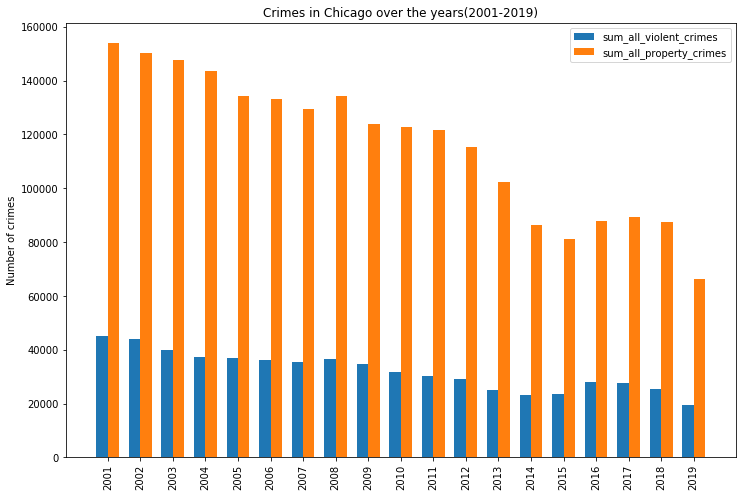

In [152]:
plt.clf()
# Plot the figure.
plt.figure(figsize=(12, 8))
N = len(all_crimes_overyears_sum_df['Year'])
ind = np.arange(N) 
width = 0.35       
plt.bar(ind,  all_crimes_overyears_sum_df['sum_all_violent_crimes'], width, label='sum_all_violent_crimes')
plt.bar(ind + width, all_crimes_overyears_sum_df['sum_all_property_crimes'], width, label='sum_all_property_crimes')

plt.ylabel('Number of crimes')
plt.title('Crimes in Chicago over the years(2001-2019)')
plt.xticks(ind + width/2 , all_crimes_overyears_sum_df['Year'], rotation='vertical')
plt.legend(loc='best')
plt.show()

As from the above plot, I realize that comparing two different types of crimes in a single plot is not very useful as their numbers are quite different. As expected, violent crimes numbers are much lesser than the property crimes. It is better to compare itself over the years.

### Create the bar plot of the violent crimes in Chicago over the years from 2001 to 2019

In [754]:
def draw_bar_plot_over_years(maindf, crimeType, title, ylabel, yrange ):
    plt.clf()
    fig, axis = plt.subplots(figsize=(20, 10))
    axis.set_title(title, fontsize=15)
    axis.set_xlabel('Year',fontsize=15 )
    axis.set_ylabel(ylabel,fontsize=15)
    #axis.yaxis.grid(True)
    plt.bar(maindf['Year'],maindf[crimeType])
    axis.set_xticks(np.arange(2001,2020,1))
    axis.set_yticks(yrange)
    plt.show()

<Figure size 432x288 with 0 Axes>

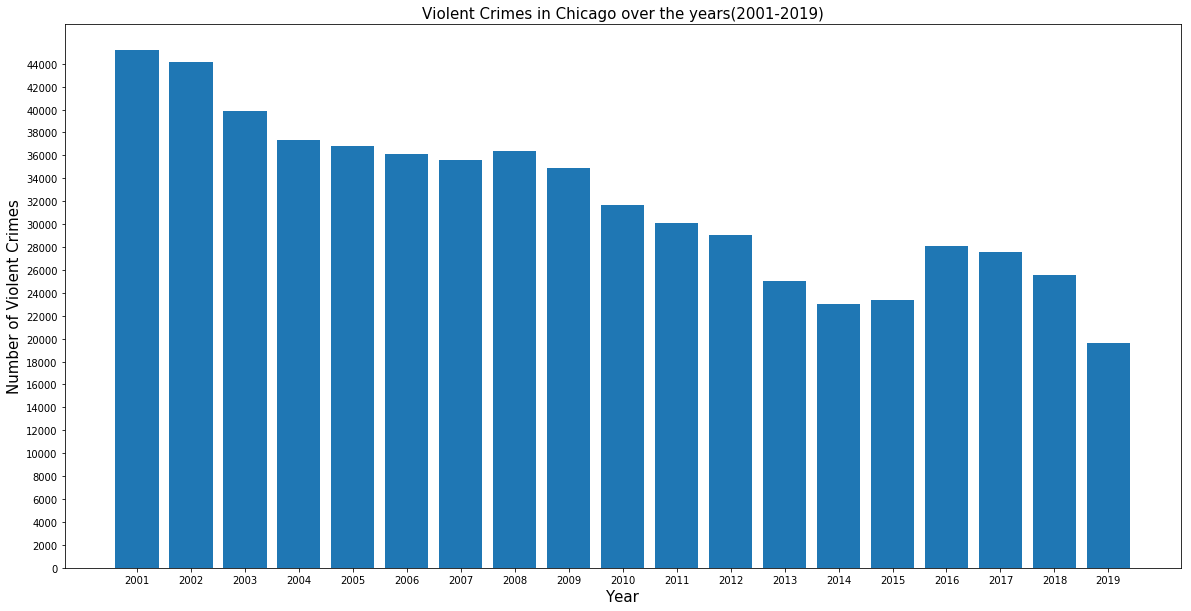

In [755]:
draw_bar_plot_over_years(all_crimes_overyears_sum_df,'sum_all_violent_crimes','Violent Crimes in Chicago over the years(2001-2019)','Number of Violent Crimes',np.arange(0,45000,2000))

### Create the bar plot of the property crimes in Chicago over the years from 2001 to 2019

<Figure size 432x288 with 0 Axes>

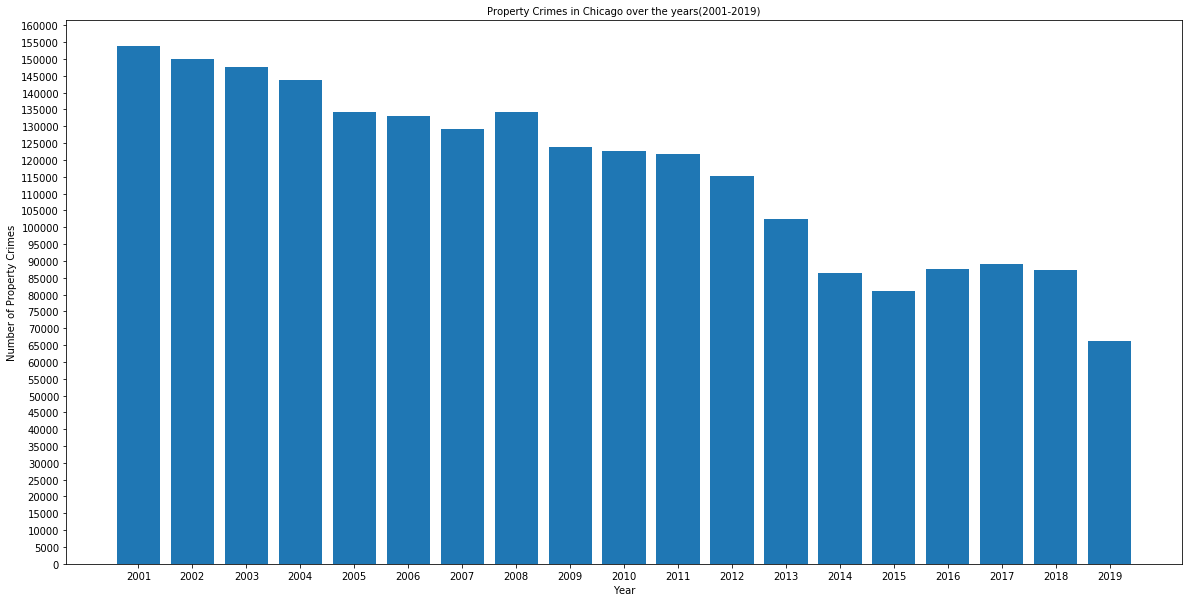

In [168]:
draw_bar_plot_over_years(all_crimes_overyears_sum_df,'sum_all_property_crimes','Property Crimes in Chicago over the years(2001-2019)','Number of Property Crimes',np.arange(0,161000,5000))

### Create the Horizontal bar plot of the Property crimes in Chicago over the years from 2001 to 2019

In [799]:
def draw_horizontal_bar_plot_over_years(maindf_X, maindf_Y, title, xlabel, ylabel ):   
    import numpy as np
    import matplotlib.pyplot as plt
    
    plt.clf()
    fig, axis = plt.subplots(figsize=(20, 15))
    y_pos = np.arange(len(maindf_Y))
    axis.barh(y_pos, maindf_X)
    
    for i, v in enumerate(maindf_X):
        axis.text(v + 5, i , '{:,}'.format(v), color='black', fontsize=13)
        
    axis.set_yticklabels(maindf_Y)
    # Create names on the y-axis
    axis.set_yticks(y_pos)
    axis.set_title(title, fontsize=25)
    axis.set_xlabel(xlabel,fontsize=25 )
    axis.set_ylabel(ylabel,fontsize=25)
    plt.show()

In [784]:
all_crimes_overyears_sum_df.sort_index(ascending=True, inplace=True)
all_crimes_overyears_sum_df.reset_index(inplace=True)
all_crimes_overyears_sum_df.head()

,Year,sum_all_violent_crimes,sum_all_property_crimes
0,2001,45190,153835
1,2002,44141,150103
2,2003,39906,147734
3,2004,37362,143610
4,2005,36821,134375


<Figure size 432x288 with 0 Axes>

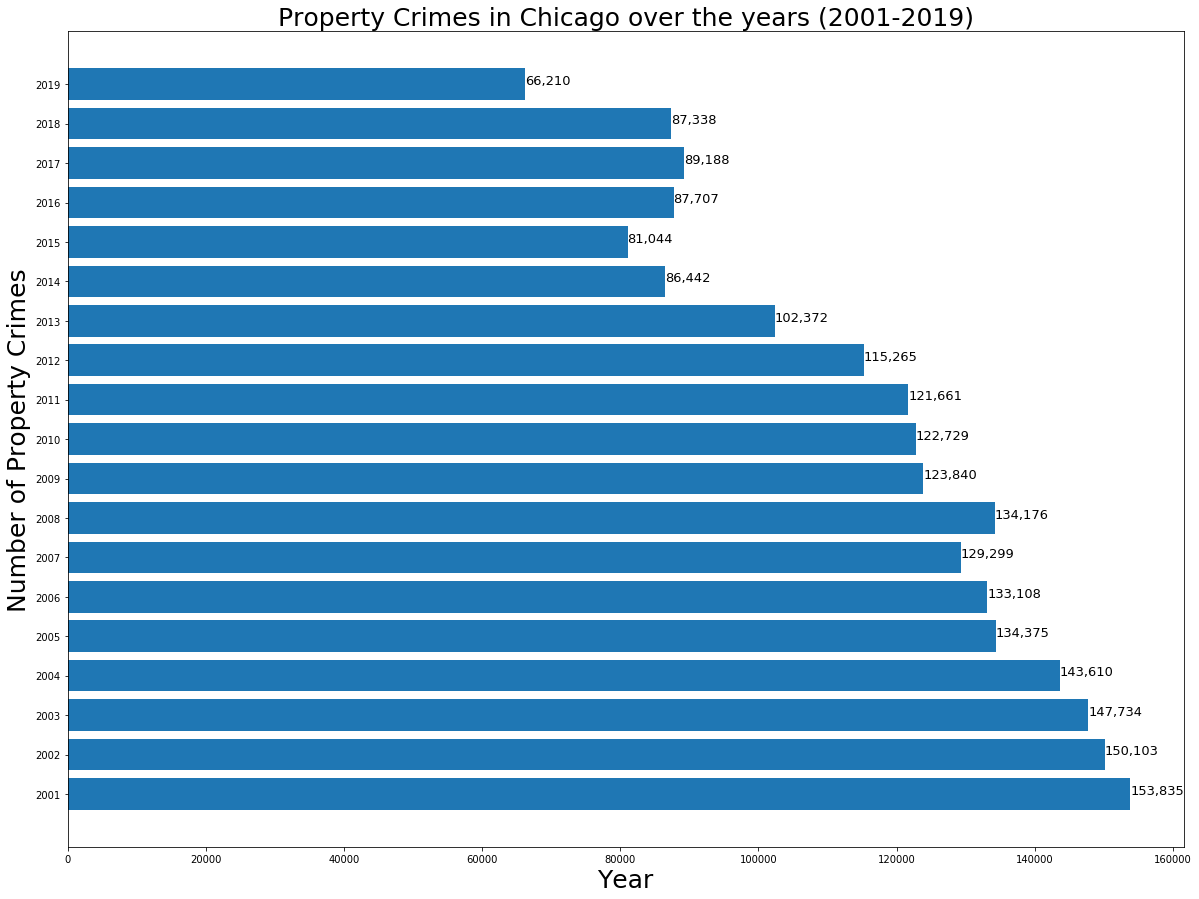

In [800]:
draw_horizontal_bar_plot_over_years(all_crimes_overyears_sum_df['sum_all_property_crimes'],all_crimes_overyears_sum_df['Year'],'Property Crimes in Chicago over the years (2001-2019)','Year','Number of Property Crimes')

<Figure size 432x288 with 0 Axes>

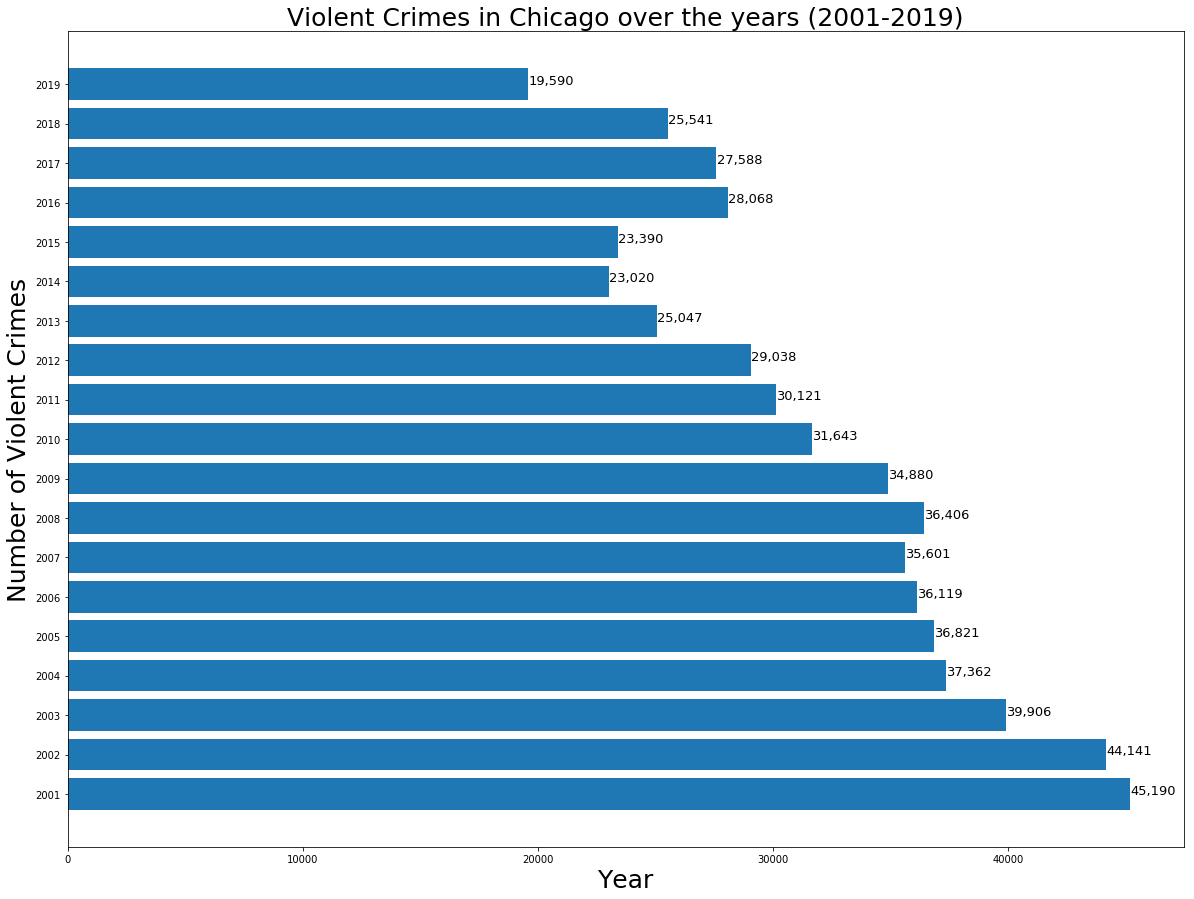

In [801]:
draw_horizontal_bar_plot_over_years(all_crimes_overyears_sum_df['sum_all_violent_crimes'],all_crimes_overyears_sum_df['Year'],'Violent Crimes in Chicago over the years (2001-2019)','Year','Number of Violent Crimes')

# Now prepare to get the Percentage change of crimes over the years

- Calculate the change % = [(New Value - Old Value)/Old Value]  * 100


- The percentage change will be calculated the current year against the previous year.
- Positive value will indicate the increase of crimes and negative value will indicate the reduction in crimes.

Start preparing data for percentage calculation for violent crimes

In [187]:
all_violent_crime_data_df = all_violent_crime_data


all_violent_crime_data_df.loc[:,'vh_change_percent'] =  ((all_violent_crime_data_df['homicide'] - all_violent_crime_data_df["homicide"].shift(1))/all_violent_crime_data_df["homicide"].shift(1))*100.0
all_violent_crime_data_df = all_violent_crime_data_df.fillna(0.0)
all_violent_crime_data_df.head()

,Year,homicide,agg_assault,agg_sexual,robbery,battery,offense_invole_children,sum_all_violent_crimes,vh_change_percent
0,2001,667,7969,804,18441,17309,274,45190,0.000000
1,2002,657,7827,861,18522,16274,293,44141,-1.499250
2,2003,604,7567,744,17332,13659,311,39906,-8.066971
3,2004,454,7579,701,15978,12650,315,37362,-24.834437
4,2005,453,7036,702,16047,12583,333,36821,-0.220264


In [188]:
all_violent_crime_data_df.loc[:,'vaa_change_percent'] =  ((all_violent_crime_data_df['agg_assault'] - all_violent_crime_data_df["agg_assault"].shift(1))/all_violent_crime_data_df["agg_assault"].shift(1))*100.0
all_violent_crime_data_df.loc[:,'vas_change_percent'] =  ((all_violent_crime_data_df['agg_sexual'] - all_violent_crime_data_df["agg_sexual"].shift(1))/all_violent_crime_data_df["agg_sexual"].shift(1))*100.0
all_violent_crime_data_df.loc[:,'vro_change_percent'] =  ((all_violent_crime_data_df['robbery'] - all_violent_crime_data_df["robbery"].shift(1))/all_violent_crime_data_df["robbery"].shift(1))*100.0
all_violent_crime_data_df.loc[:,'vba_change_percent'] =  ((all_violent_crime_data_df['battery'] - all_violent_crime_data_df["battery"].shift(1))/all_violent_crime_data_df["battery"].shift(1))*100.0
all_violent_crime_data_df.loc[:,'voc_change_percent'] =  ((all_violent_crime_data_df['offense_invole_children'] - all_violent_crime_data_df["offense_invole_children"].shift(1))/all_violent_crime_data_df["offense_invole_children"].shift(1))*100.0

all_violent_crime_data_df = all_violent_crime_data_df.fillna(0.0)
all_violent_crime_data_df.head()

,Year,homicide,agg_assault,agg_sexual,robbery,battery,offense_invole_children,sum_all_violent_crimes,vh_change_percent,vaa_change_percent,vas_change_percent,vro_change_percent,vba_change_percent,voc_change_percent
0,2001,667,7969,804,18441,17309,274,45190,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2002,657,7827,861,18522,16274,293,44141,-1.499250,-1.781905,7.089552,0.439239,-5.979548,6.934307
2,2003,604,7567,744,17332,13659,311,39906,-8.066971,-3.321835,-13.588850,-6.424792,-16.068576,6.143345
3,2004,454,7579,701,15978,12650,315,37362,-24.834437,0.158583,-5.779570,-7.812139,-7.387071,1.286174
4,2005,453,7036,702,16047,12583,333,36821,-0.220264,-7.164534,0.142653,0.431844,-0.529644,5.714286


Start preparing data for percentage calculation for property crimes

In [190]:
all_property_crime_data_df = all_property_crime_data
all_property_crime_data_df.head()

,Year,arson,burglary,theft,motor_vehicle_theft,sum_all_property_crimes
0,2001,1010,26011,99265,27549,153835
1,2002,1032,25623,98327,25121,150103
2,2003,955,25156,98875,22748,147734
3,2004,778,24564,95463,22805,143610
4,2005,691,25503,85684,22497,134375


In [191]:
all_property_crime_data_df.loc[:,'par_change_percent'] =  ((all_property_crime_data_df['arson'] - all_property_crime_data_df["arson"].shift(1))/all_property_crime_data_df["arson"].shift(1))*100.0
all_property_crime_data_df.loc[:,'pbu_change_percent'] =  ((all_property_crime_data_df['burglary'] - all_property_crime_data_df["burglary"].shift(1))/all_property_crime_data_df["burglary"].shift(1))*100.0
all_property_crime_data_df.loc[:,'pth_change_percent'] =  ((all_property_crime_data_df['theft'] - all_property_crime_data_df["theft"].shift(1))/all_property_crime_data_df["theft"].shift(1))*100.0
all_property_crime_data_df.loc[:,'pmth_change_percent'] =  ((all_property_crime_data_df['motor_vehicle_theft'] - all_property_crime_data_df["motor_vehicle_theft"].shift(1))/all_property_crime_data_df["motor_vehicle_theft"].shift(1))*100.0

all_property_crime_data_df = all_property_crime_data_df.fillna(0.0)
all_property_crime_data_df.head()

,Year,arson,burglary,theft,motor_vehicle_theft,sum_all_property_crimes,par_change_percent,pbu_change_percent,pth_change_percent,pmth_change_percent
0,2001,1010,26011,99265,27549,153835,0.000000,0.000000,0.000000,0.000000
1,2002,1032,25623,98327,25121,150103,2.178218,-1.491677,-0.944945,-8.813387
2,2003,955,25156,98875,22748,147734,-7.461240,-1.822581,0.557324,-9.446280
3,2004,778,24564,95463,22805,143610,-18.534031,-2.353315,-3.450822,0.250571
4,2005,691,25503,85684,22497,134375,-11.182519,3.822667,-10.243759,-1.350581


In [194]:
#extract the data that I only need for the plot
all_violent_crime_percent_df = all_violent_crime_data_df[['Year','vh_change_percent','vaa_change_percent','vas_change_percent','vro_change_percent','vba_change_percent','voc_change_percent']]
all_violent_crime_percent_df.head()

,Year,vh_change_percent,vaa_change_percent,vas_change_percent,vro_change_percent,vba_change_percent,voc_change_percent
0,2001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2002,-1.499250,-1.781905,7.089552,0.439239,-5.979548,6.934307
2,2003,-8.066971,-3.321835,-13.588850,-6.424792,-16.068576,6.143345
3,2004,-24.834437,0.158583,-5.779570,-7.812139,-7.387071,1.286174
4,2005,-0.220264,-7.164534,0.142653,0.431844,-0.529644,5.714286


In [204]:
#better to rename all the columns to get better visualization interpretation
all_violent_crime_percent_df.rename(columns={'vh_change_percent':'homicide'}, inplace=True)
all_violent_crime_percent_df.rename(columns={'vaa_change_percent':'agg_assault'}, inplace=True)
all_violent_crime_percent_df.rename(columns={'vas_change_percent':'agg_sexual'}, inplace=True)
all_violent_crime_percent_df.rename(columns={'vro_change_percent':'robbery'}, inplace=True)
all_violent_crime_percent_df.rename(columns={'vba_change_percent':'battery'}, inplace=True)
all_violent_crime_percent_df.rename(columns={'voc_change_percent':'offense_invole_children'}, inplace=True)

In [208]:
#extract the data that I only need for the plot
all_property_crime_percent_df = all_property_crime_data_df[['Year','par_change_percent','pbu_change_percent','pth_change_percent','pmth_change_percent']]
all_property_crime_percent_df.head()

,Year,par_change_percent,pbu_change_percent,pth_change_percent,pmth_change_percent
0,2001,0.000000,0.000000,0.000000,0.000000
1,2002,2.178218,-1.491677,-0.944945,-8.813387
2,2003,-7.461240,-1.822581,0.557324,-9.446280
3,2004,-18.534031,-2.353315,-3.450822,0.250571
4,2005,-11.182519,3.822667,-10.243759,-1.350581


In [209]:
#better to rename all the columns to get better visualization interpretation
all_property_crime_percent_df.rename(columns={'par_change_percent':'arson'}, inplace=True)
all_property_crime_percent_df.rename(columns={'pbu_change_percent':'burglary'}, inplace=True)
all_property_crime_percent_df.rename(columns={'pth_change_percent':'theft'}, inplace=True)
all_property_crime_percent_df.rename(columns={'pmth_change_percent':'motor_vehicle_theft'}, inplace=True)


Draw the heatmap to compare the % change of crime from the previous year to the current year

- Positive % will indicate "Red"  = Unfavorable condition
- Negative % will indicate "Green" = Favorable condition

In [819]:
def draw_heatmap(df, titleName, xlabel, ylabel, maxValue, minValue):
    import seaborn as sns
    from matplotlib import ticker

    fig, axis = plt.subplots(figsize=(20, 20))
    axis.set_title(titleName + ' Heat Map', fontsize=25)
    ticks = np.arange(minValue,maxValue,10)
    akws = {"ha": 'center',"va": 'top','fontsize':15}
    
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(133, 10, as_cmap=True)
    
    #Blues_r
    ax = sns.heatmap(df, linewidth=1,annot=True, square=True, annot_kws=akws, cmap=cmap, 
                     cbar_kws={'ticks': ticks}, vmin=minValue, vmax=maxValue,center=0.00)   
    for t in ax.texts: t.set_text(t.get_text() + " %")
    plt.ylabel(ylabel, fontsize=18)
    plt.xlabel(xlabel, fontsize=18)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=15)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=45,ha='center', va='center', minor=False, fontsize=15)
   
 
    #fix the issues of seaborn having top,bottom cut-off
    #bottom, top = ax.get_ylim()
    #ax.set_ylim(bottom  +0.5, top - 0.5)
      
    #create some space
    ax.tick_params(axis='y', which='major', pad=10)
    ax.tick_params(axis='x', which='major', pad=5)
    plt.tight_layout()

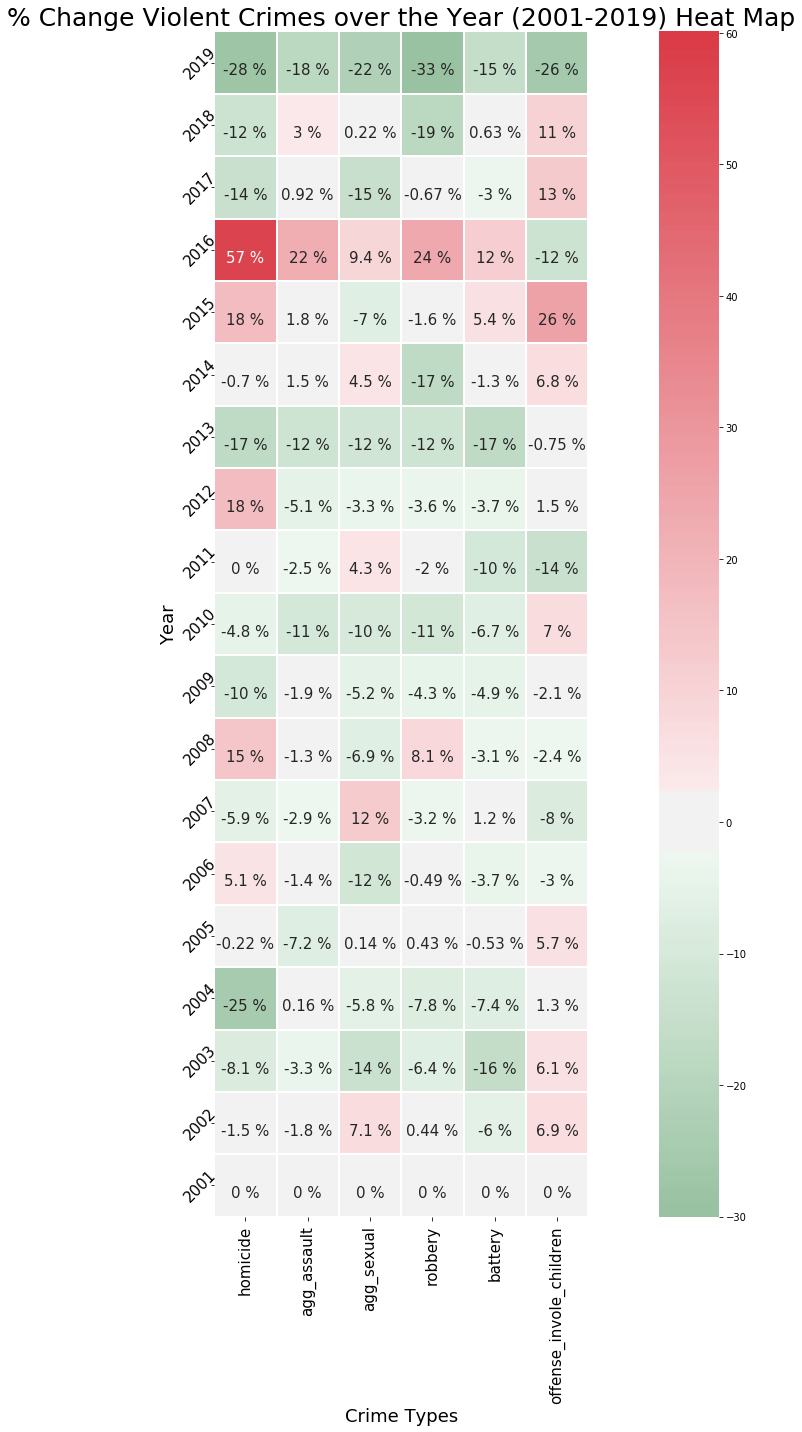

In [821]:
#if redraw again
all_violent_crime_percent_df = all_violent_crime_percent_df.reset_index()


all_violent_crime_percent_df =all_violent_crime_percent_df.set_index('Year')
all_violent_crime_percent_df=all_violent_crime_percent_df.sort_index(ascending=False)

draw_heatmap(all_violent_crime_percent_df,'% Change Violent Crimes over the Year (2001-2019)', 
             'Crime Types', 'Year',60.1,-30)

In [236]:
all_property_crime_percent_df.head()

,Year,arson,burglary,theft,motor_vehicle_theft
0,2019,-19.302949,-33.429837,-22.197526,-26.532452
1,2018,-15.990991,-9.654589,1.361073,-12.297962
2,2017,-13.953488,-9.015189,4.463489,0.805809
3,2016,13.907285,8.374422,7.448552,12.167263
4,2015,14.105793,-9.513350,-6.861153,1.573850


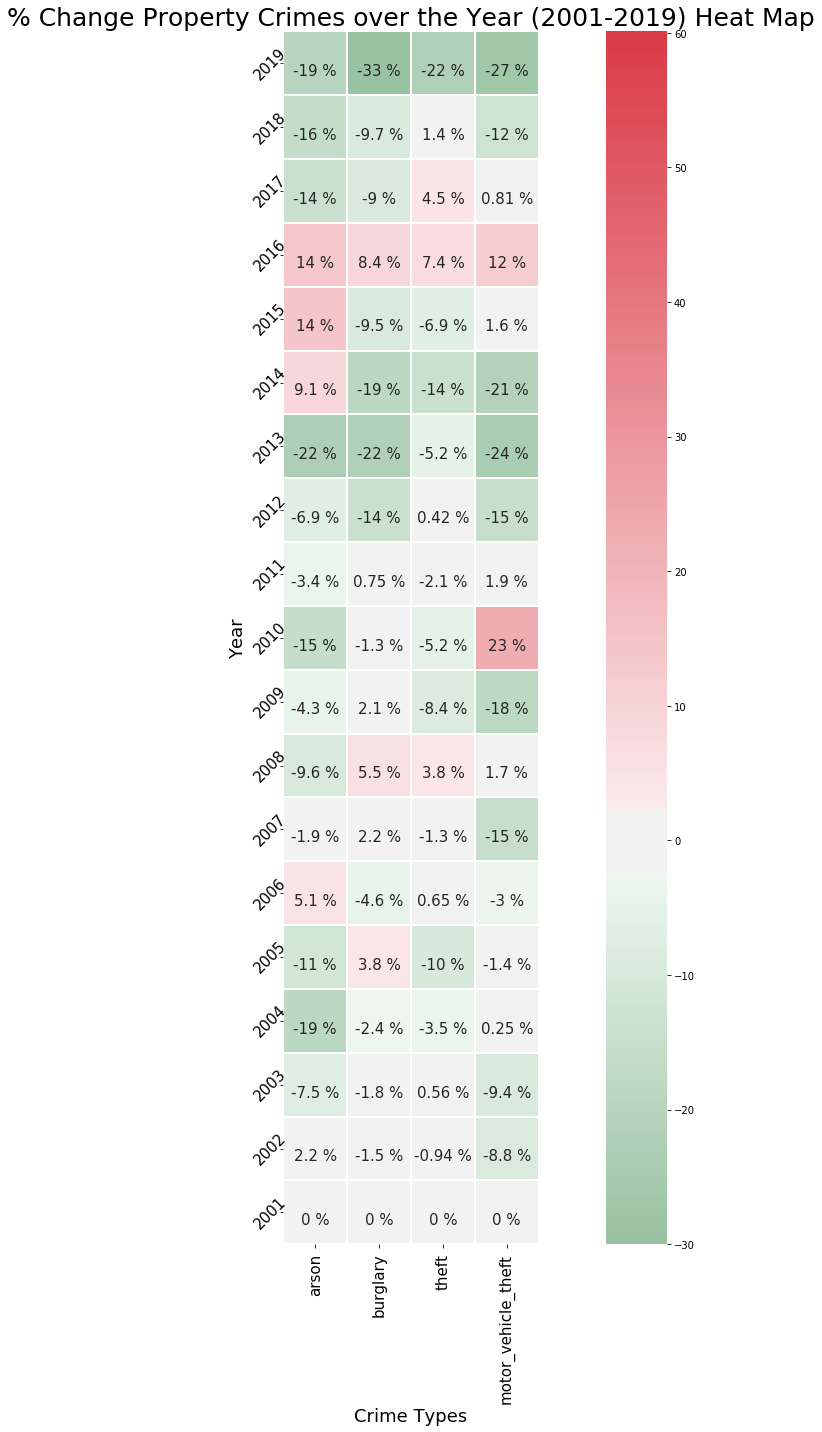

In [824]:
#if redraw again
all_property_crime_percent_df = all_property_crime_percent_df.reset_index()

all_property_crime_percent_df =all_property_crime_percent_df.set_index('Year')
all_property_crime_percent_df=all_property_crime_percent_df.sort_index(ascending=False)

draw_heatmap(all_property_crime_percent_df,'% Change Property Crimes over the Year (2001-2019)', 
             'Crime Types', 'Year',60.1,-30)

In [240]:
homicide_filter_df.head()

,Year,Primary Type,Value
28566,2003,HOMICIDE,1
36781,2001,HOMICIDE,1
60816,2019,HOMICIDE,1
64265,2019,HOMICIDE,1
64381,2019,HOMICIDE,1


In [241]:
homicide_filter_data.head()

,Unnamed: 0,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
28566,28566,HJ374672,05/20/2003 03:15:00 AM,015XX N LASALLE ST,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,True,True,1821,NaN,01A,NaN,NaN,2003,NaN,NaN,NaN
36781,36781,G446123,07/29/2001 10:15:00 AM,011XX N LASALLE ST,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,False,1824,NaN,01A,NaN,NaN,2001,NaN,NaN,NaN
60816,60816,JC113580,01/11/2019 10:30:00 PM,000XX E IDA B WELLS DR,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,111,4.0,01A,NaN,NaN,2019,NaN,NaN,NaN
64265,64265,JC281195,05/27/2019 11:42:00 PM,085XX S CICERO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,834,18.0,01A,1145925.0,1847569.0,2019,41.737710,-87.740958,"(41.737709752, -87.740958098)"
64381,64381,JC281250,05/28/2019 12:25:00 AM,018XX N MONTICELLO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,False,2535,1.0,01A,1151758.0,1911886.0,2019,41.914092,-87.717899,"(41.914092032, -87.717899225)"


# Which locations ("Street", "Hotel", "Residence" etc) are more susceptible to violent crimes for homicides
- Find the violent crimes of Homicides occur frequently in which location


In [345]:
homicide_location_filter_df = homicide_filter_data[['Location Description']]
homicide_location_filter_df['Value'] = 1
homicide_location_filter_df.head()

,Location Description,Value
28566,APARTMENT,1
36781,ALLEY,1
60816,STREET,1
64265,PARKING LOT,1
64381,PARK PROPERTY,1


In [346]:
homicide_location_filter_df =homicide_location_filter_df.groupby(['Location Description']).sum()
homicide_location_filter_df.head()

,Value
Location Description,
ABANDONED BUILDING,27
ALLEY,635
APARTMENT,859
AUTO,1143
BANK,1


In [347]:
homicide_location_filter_df.max()
homicide_location_filter_df = homicide_location_filter_df.reset_index()

In [348]:
#find the max occurance.
homicide_location_filter_df.iloc[homicide_location_filter_df['Value'].idxmax()]

Location Description    STREET
Value                     4893
Name: 77, dtype: object

In [349]:
homicide_location_filter_df = homicide_location_filter_df.sort_index(by=['Value'], ascending=False)

In [350]:
homicide_location_filter_df.head()

,Location Description,Value
77,STREET,4893
3,AUTO,1143
2,APARTMENT,859
1,ALLEY,635
47,HOUSE,541


In [351]:
homicide_location_filter_df.shape

(89, 2)

In [352]:
total = homicide_location_filter_df['Value'].sum()
total

9959

Calculate the percentage of homicide crime happening in the certain location comparing to others

In [353]:
homicide_location_filter_df['percent'] = (homicide_location_filter_df['Value'] / total) * 100.0

In [354]:
#del homicide_location_filter_df['level_0']
#del homicide_location_filter_df['index']
homicide_location_filter_df.head(15)

,Location Description,Value,percent
77,STREET,4893,49.131439
3,AUTO,1143,11.477056
2,APARTMENT,859,8.625364
1,ALLEY,635,6.376142
47,HOUSE,541,5.432272
62,PORCH,306,3.072598
87,YARD,213,2.138769
60,PARKING LOT,167,1.676875
59,PARK PROPERTY,109,1.094487
83,VACANT LOT,105,1.054323


From the above data, the location percentage can be clearly seen that "STREET" has the hightest percentage and the other locations have the smaller percentage. If the percent is less than 2%, all will be put into "rest of the locations".

In [355]:
homicide_location_filter_df.shape

(89, 3)

In [382]:
the_rest_location = homicide_location_filter_df[homicide_location_filter_df['percent'] < 2]
the_rest_location.head()

,Location Description,Value,percent
60,PARKING LOT,167,1.676875
59,PARK PROPERTY,109,1.094487
83,VACANT LOT,105,1.054323
43,HALLWAY,84,0.843458
69,RETAIL STORE,72,0.722964


In [383]:
total_rest_loc_percent = the_rest_location['percent'].sum()
total_rest_loc_percent

13.746360076312882

In [358]:
total_rest_loc_value = the_rest_location['Value'].sum()
total_rest_loc_value

1369

In [388]:
top_locations = homicide_location_filter_df[homicide_location_filter_df['percent'] >= 2]
top_locations

,Location Description,Value,percent
77,STREET,4893,49.131439
3,AUTO,1143,11.477056
2,APARTMENT,859,8.625364
1,ALLEY,635,6.376142
47,HOUSE,541,5.432272
62,PORCH,306,3.072598
87,YARD,213,2.138769


Add the rest of the location row into the dataframes

In [390]:
#add the rest of the location row into the dataframes
top_locations.loc[len(top_locations)] = ["REST OF LOCATIONS",total_rest_loc_value, total_rest_loc_percent]
top_locations

,Location Description,Value,percent
77,STREET,4893,49.131439
3,AUTO,1143,11.477056
2,APARTMENT,859,8.625364
1,ALLEY,635,6.376142
47,HOUSE,541,5.432272
62,PORCH,306,3.072598
87,YARD,213,2.138769
7,REST OF LOCATIONS,1369,13.746360


In [391]:
all_homicide_loc_df = top_locations
all_homicide_loc_df

,Location Description,Value,percent
77,STREET,4893,49.131439
3,AUTO,1143,11.477056
2,APARTMENT,859,8.625364
1,ALLEY,635,6.376142
47,HOUSE,541,5.432272
62,PORCH,306,3.072598
87,YARD,213,2.138769
7,REST OF LOCATIONS,1369,13.746360


In [444]:
a = np.empty(10)
a.fill(0.0)
a

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

**Now draw the pie chart with place of occurance when homicides occur in Pie chart.**

In [834]:
def draw_pie_chart_locations(maindf,title):
    fig1 = plt.figure(figsize=[10, 10])
    ax1 = fig1.add_subplot(111)

    labels = maindf['Location Description']
    sizes = maindf['percent']
    explodelist =np.empty(maindf.shape[0])  
    explodelist.fill(0.0)
    
    #the first wedge to explode from the rest
    explodelist[0] = 0.7
  
    colors = ['red','yellow','magenta','lightskyblue','cyan','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan']
    patches, texts, autotexts = ax1.pie(sizes,  labels=labels, autopct='%.1f%%',
                                        colors = colors, 
                                        explode=explodelist,
                                        shadow=True, startangle=120,
                                        pctdistance=0.5, labeldistance=1.05, radius=15.0)

    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title(title, fontsize=15)
    plt.tight_layout()
    plt.show()

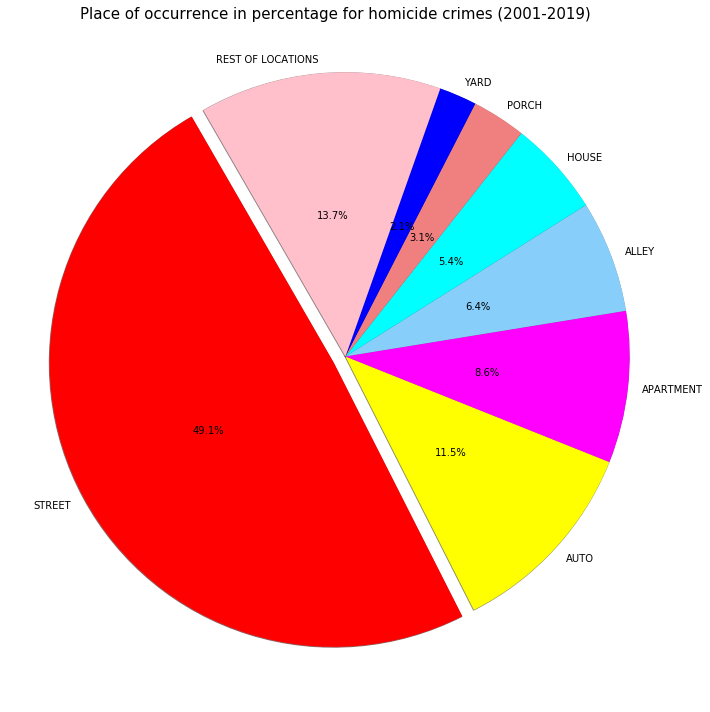

In [835]:
draw_pie_chart_locations(all_homicide_loc_df,"Place of occurrence in percentage for homicide crimes (2001-2019)")

In [365]:
robbery_location_filter_df = robbery_filter_data[['Location Description']]
robbery_location_filter_df['Value'] = 1
robbery_location_filter_df =robbery_location_filter_df.groupby(['Location Description']).sum()
robbery_location_filter_df = robbery_location_filter_df.sort_index(by=['Value'], ascending=False)
robbery_location_filter_df = robbery_location_filter_df.reset_index()
robbery_location_filter_df.head()

,Location Description,Value
0,STREET,81010
1,SIDEWALK,80983
2,ALLEY,18572
3,PARKING LOT/GARAGE(NON.RESID.),8076
4,SMALL RETAIL STORE,6333


In [366]:
robbery_location_filter_df['percent'] = (robbery_location_filter_df['Value'] / robbery_location_filter_df['Value'].sum()) * 100.0

In [368]:
robbery_location_filter_df.head(15)

,Location Description,Value,percent
0,STREET,81010,30.757023
1,SIDEWALK,80983,30.746772
2,ALLEY,18572,7.051221
3,PARKING LOT/GARAGE(NON.RESID.),8076,3.066211
4,SMALL RETAIL STORE,6333,2.404447
5,GAS STATION,5869,2.228280
6,OTHER,5850,2.221066
7,RESIDENCE,5040,1.913534
8,RESIDENCE PORCH/HALLWAY,4826,1.832285
9,APARTMENT,4633,1.759009


In [394]:
rest_of_loc = robbery_location_filter_df[robbery_location_filter_df['percent'] < 2]
rest_of_loc.head()

,Location Description,Value,percent
7,RESIDENCE,5040,1.913534
8,RESIDENCE PORCH/HALLWAY,4826,1.832285
9,APARTMENT,4633,1.759009
10,RESTAURANT,4427,1.680797
11,PARK PROPERTY,3440,1.306063


In [831]:
top_locations = robbery_location_filter_df[robbery_location_filter_df['percent'] >= 2]
top_locations

,Location Description,Value,percent
0,STREET,81010,30.757023
1,SIDEWALK,80983,30.746772
2,ALLEY,18572,7.051221
3,PARKING LOT/GARAGE(NON.RESID.),8076,3.066211
4,SMALL RETAIL STORE,6333,2.404447
5,GAS STATION,5869,2.228280
6,OTHER,5850,2.221066


In [832]:
#add the rest of the location row into the dataframes
top_locations.loc[len(top_locations)] = ["REST OF LOCATIONS",rest_of_loc['Value'].sum(), rest_of_loc['percent'].sum()]
all_robbery_loc_df = top_locations
all_robbery_loc_df

,Location Description,Value,percent
0,STREET,81010,30.757023
1,SIDEWALK,80983,30.746772
2,ALLEY,18572,7.051221
3,PARKING LOT/GARAGE(NON.RESID.),8076,3.066211
4,SMALL RETAIL STORE,6333,2.404447
5,GAS STATION,5869,2.228280
6,OTHER,5850,2.221066
7,REST OF LOCATIONS,223,3.862141


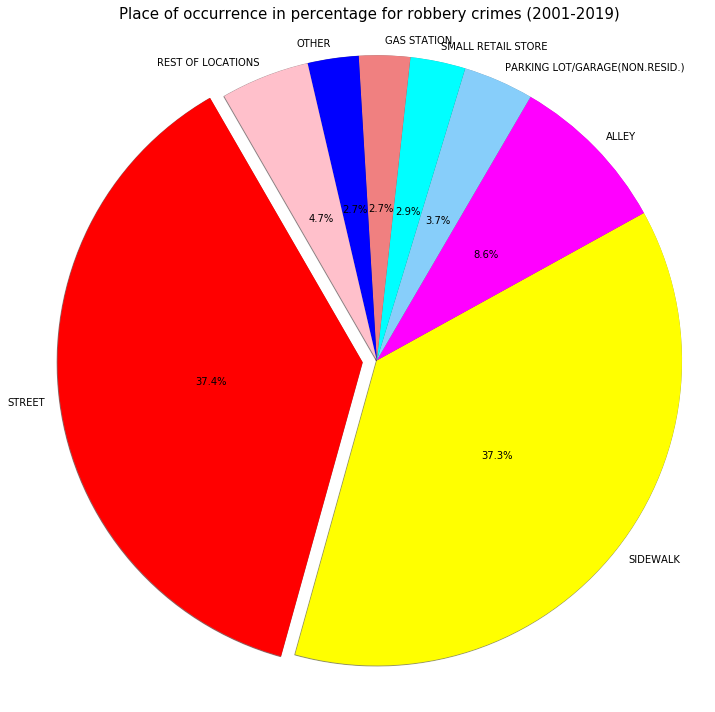

In [836]:
draw_pie_chart_locations(all_robbery_loc_df,"Place of occurrence in percentage for robbery crimes (2001-2019)")

In [369]:
agg_assault_location_filter_df = agg_assault_filter_data[['Location Description']]
agg_assault_location_filter_df['Value'] = 1
agg_assault_location_filter_df =agg_assault_location_filter_df.groupby(['Location Description']).sum()
agg_assault_location_filter_df = agg_assault_location_filter_df.sort_index(by=['Value'], ascending=False)
agg_assault_location_filter_df = agg_assault_location_filter_df.reset_index()
agg_assault_location_filter_df.head()

,Location Description,Value
0,STREET,35538
1,SIDEWALK,18992
2,RESIDENCE,16978
3,APARTMENT,13991
4,ALLEY,4896


In [370]:
agg_assault_location_filter_df['percent'] = (agg_assault_location_filter_df['Value'] / agg_assault_location_filter_df['Value'].sum()) * 100.0

In [371]:
agg_assault_location_filter_df.head(15)

,Location Description,Value,percent
0,STREET,35538,29.739161
1,SIDEWALK,18992,15.893020
2,RESIDENCE,16978,14.207650
3,APARTMENT,13991,11.708048
4,ALLEY,4896,4.097105
5,RESIDENCE PORCH/HALLWAY,4310,3.606725
6,PARKING LOT/GARAGE(NON.RESID.),2586,2.164035
7,OTHER,2409,2.015916
8,"SCHOOL, PUBLIC, BUILDING",2320,1.941439
9,RESIDENTIAL YARD (FRONT/BACK),1687,1.411727


In [408]:
rest_of_loc = agg_assault_location_filter_df[agg_assault_location_filter_df['percent'] < 2]
rest_of_loc.head()

,Location Description,Value,percent
8,"SCHOOL, PUBLIC, BUILDING",2320,1.941439
9,RESIDENTIAL YARD (FRONT/BACK),1687,1.411727
10,GAS STATION,1562,1.307124
11,RESTAURANT,1298,1.086202
12,CHA PARKING LOT/GROUNDS,1038,0.868627


In [409]:
top_locations = agg_assault_location_filter_df[agg_assault_location_filter_df['percent'] >= 2]
top_locations

,Location Description,Value,percent
0,STREET,35538,29.739161
1,SIDEWALK,18992,15.893020
2,RESIDENCE,16978,14.207650
3,APARTMENT,13991,11.708048
4,ALLEY,4896,4.097105
5,RESIDENCE PORCH/HALLWAY,4310,3.606725
6,PARKING LOT/GARAGE(NON.RESID.),2586,2.164035
7,OTHER,2409,2.015916


In [410]:
#add the rest of the location row into the dataframes
top_locations.loc[len(top_locations)] = ["REST OF LOCATIONS",rest_of_loc['Value'].sum(), rest_of_loc['percent'].sum()]
all_agg_assault_loc_df = top_locations
all_agg_assault_loc_df

,Location Description,Value,percent
0,STREET,35538,29.739161
1,SIDEWALK,18992,15.893020
2,RESIDENCE,16978,14.207650
3,APARTMENT,13991,11.708048
4,ALLEY,4896,4.097105
5,RESIDENCE PORCH/HALLWAY,4310,3.606725
6,PARKING LOT/GARAGE(NON.RESID.),2586,2.164035
7,OTHER,2409,2.015916
8,REST OF LOCATIONS,19799,16.568339


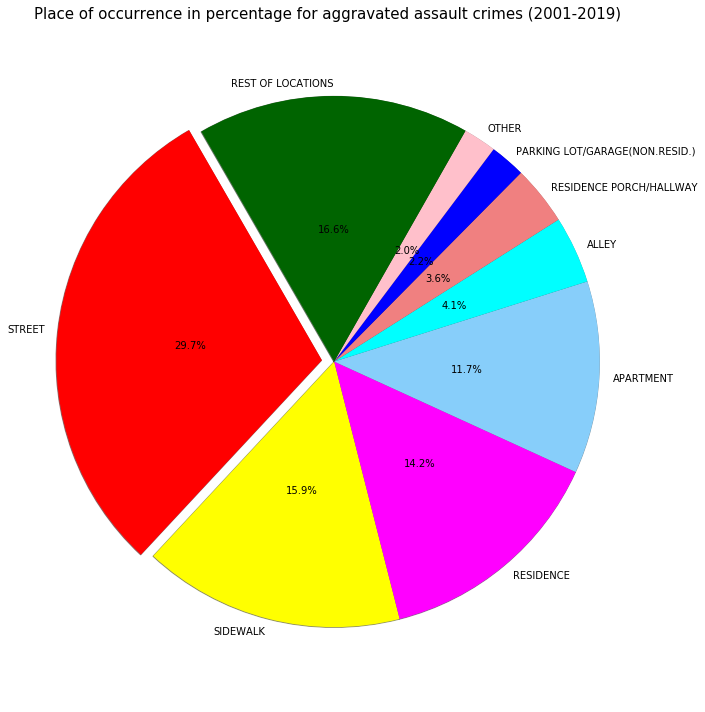

In [837]:
draw_pie_chart_locations(all_agg_assault_loc_df,"Place of occurrence in percentage for aggravated assault crimes (2001-2019)")

In [372]:
agg_sexual_location_filter_df = assault_sexual_filter_data[['Location Description']]
agg_sexual_location_filter_df['Value'] = 1
agg_sexual_location_filter_df =agg_sexual_location_filter_df.groupby(['Location Description']).sum()
agg_sexual_location_filter_df = agg_sexual_location_filter_df.sort_index(by=['Value'], ascending=False)
agg_sexual_location_filter_df = agg_sexual_location_filter_df.reset_index()
agg_sexual_location_filter_df.head()

,Location Description,Value
0,RESIDENCE,3838
1,APARTMENT,2512
2,ALLEY,985
3,STREET,615
4,VEHICLE NON-COMMERCIAL,528


In [373]:
agg_sexual_location_filter_df['percent'] = (agg_sexual_location_filter_df['Value'] / agg_sexual_location_filter_df['Value'].sum()) * 100.0
agg_sexual_location_filter_df.head(15)

,Location Description,Value,percent
0,RESIDENCE,3838,33.844797
1,APARTMENT,2512,22.151675
2,ALLEY,985,8.686067
3,STREET,615,5.423280
4,VEHICLE NON-COMMERCIAL,528,4.656085
5,OTHER,480,4.232804
6,SIDEWALK,312,2.751323
7,RESIDENCE PORCH/HALLWAY,220,1.940035
8,ABANDONED BUILDING,209,1.843034
9,HOTEL/MOTEL,169,1.490300


In [412]:
rest_of_loc = agg_sexual_location_filter_df[agg_sexual_location_filter_df['percent'] < 2]
rest_of_loc.head()

,Location Description,Value,percent
7,RESIDENCE PORCH/HALLWAY,220,1.940035
8,ABANDONED BUILDING,209,1.843034
9,HOTEL/MOTEL,169,1.490300
10,PARK PROPERTY,168,1.481481
11,RESIDENCE-GARAGE,148,1.305115


In [413]:
top_locations = agg_sexual_location_filter_df[agg_sexual_location_filter_df['percent'] >= 2]
top_locations

,Location Description,Value,percent
0,RESIDENCE,3838,33.844797
1,APARTMENT,2512,22.151675
2,ALLEY,985,8.686067
3,STREET,615,5.423280
4,VEHICLE NON-COMMERCIAL,528,4.656085
5,OTHER,480,4.232804
6,SIDEWALK,312,2.751323


In [414]:
#add the rest of the location row into the dataframes
top_locations.loc[len(top_locations)] = ["REST OF LOCATIONS",rest_of_loc['Value'].sum(), rest_of_loc['percent'].sum()]
all_agg_sexual_loc_df = top_locations
all_agg_sexual_loc_df

,Location Description,Value,percent
0,RESIDENCE,3838,33.844797
1,APARTMENT,2512,22.151675
2,ALLEY,985,8.686067
3,STREET,615,5.423280
4,VEHICLE NON-COMMERCIAL,528,4.656085
5,OTHER,480,4.232804
6,SIDEWALK,312,2.751323
7,REST OF LOCATIONS,2070,18.253968


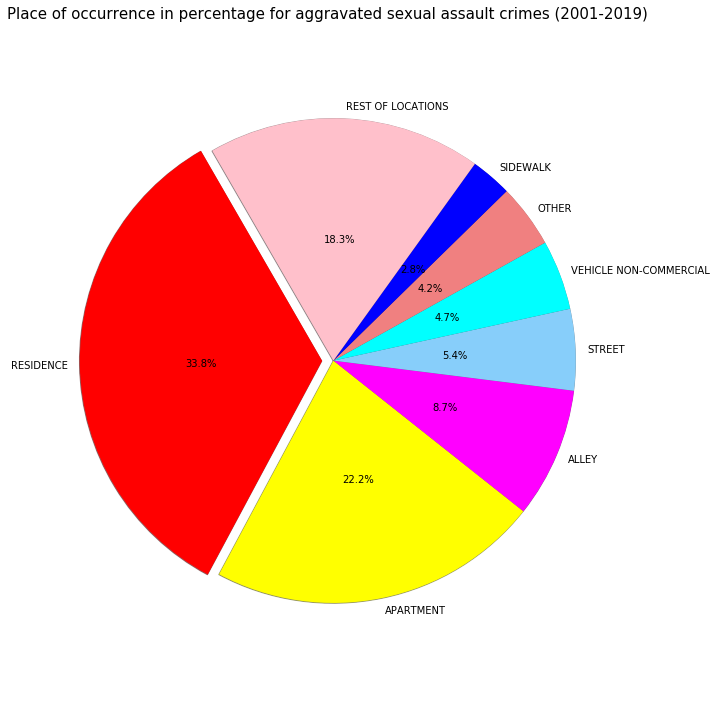

In [838]:
draw_pie_chart_locations(all_agg_sexual_loc_df,"Place of occurrence in percentage for aggravated sexual assault crimes (2001-2019)")

In [453]:
battery_location_filter_df = battery_filter_data[['Location Description']]
battery_location_filter_df['Value'] = 1
battery_location_filter_df =battery_location_filter_df.groupby(['Location Description']).sum()
battery_location_filter_df = battery_location_filter_df.sort_index(by=['Value'], ascending=False)
battery_location_filter_df = battery_location_filter_df.reset_index()
battery_location_filter_df.head()

,Location Description,Value
0,STREET,54156
1,SIDEWALK,44437
2,RESIDENCE,25061
3,APARTMENT,24516
4,ALLEY,8615


In [424]:
battery_location_filter_df['percent'] = (battery_location_filter_df['Value'] / battery_location_filter_df['Value'].sum()) * 100.0
battery_location_filter_df.head(15)

,Location Description,Value,percent
0,STREET,54156,26.381271
1,SIDEWALK,44437,21.646808
2,RESIDENCE,25061,12.208084
3,APARTMENT,24516,11.942596
4,ALLEY,8615,4.196666
5,RESIDENCE PORCH/HALLWAY,6377,3.106458
6,"SCHOOL, PUBLIC, BUILDING",4127,2.010405
7,OTHER,4119,2.006508
8,PARKING LOT/GARAGE(NON.RESID.),3515,1.712279
9,PARK PROPERTY,2649,1.290420


In [425]:
rest_of_loc = battery_location_filter_df[battery_location_filter_df['percent'] < 2]
rest_of_loc.head()

,Location Description,Value,percent
8,PARKING LOT/GARAGE(NON.RESID.),3515,1.712279
9,PARK PROPERTY,2649,1.290420
10,CHA PARKING LOT/GROUNDS,2413,1.175456
11,BAR OR TAVERN,2370,1.154509
12,RESIDENTIAL YARD (FRONT/BACK),2129,1.037110


In [426]:
top_locations = battery_location_filter_df[battery_location_filter_df['percent'] >= 2]
top_locations

,Location Description,Value,percent
0,STREET,54156,26.381271
1,SIDEWALK,44437,21.646808
2,RESIDENCE,25061,12.208084
3,APARTMENT,24516,11.942596
4,ALLEY,8615,4.196666
5,RESIDENCE PORCH/HALLWAY,6377,3.106458
6,"SCHOOL, PUBLIC, BUILDING",4127,2.010405
7,OTHER,4119,2.006508


In [427]:
#add the rest of the location row into the dataframes
top_locations.loc[len(top_locations)] = ["REST OF LOCATIONS",rest_of_loc['Value'].sum(), rest_of_loc['percent'].sum()]
all_battery_loc_df = top_locations
all_battery_loc_df

,Location Description,Value,percent
0,STREET,54156,26.381271
1,SIDEWALK,44437,21.646808
2,RESIDENCE,25061,12.208084
3,APARTMENT,24516,11.942596
4,ALLEY,8615,4.196666
5,RESIDENCE PORCH/HALLWAY,6377,3.106458
6,"SCHOOL, PUBLIC, BUILDING",4127,2.010405
7,OTHER,4119,2.006508
8,REST OF LOCATIONS,33874,16.501203


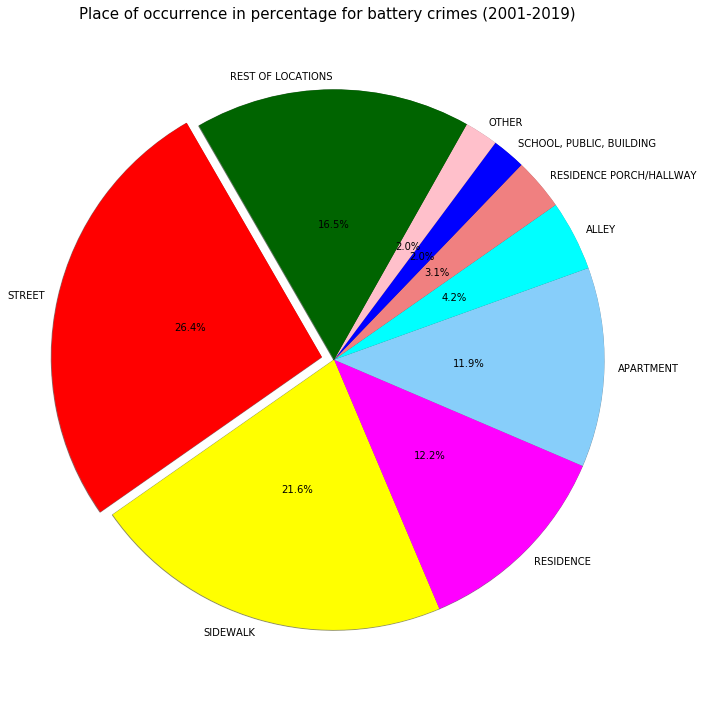

In [839]:
draw_pie_chart_locations(all_battery_loc_df,"Place of occurrence in percentage for battery crimes (2001-2019)")

In [376]:
involve_children_location_filter_df = involve_children_filter_data[['Location Description']]
involve_children_location_filter_df['Value'] = 1
involve_children_location_filter_df =involve_children_location_filter_df.groupby(['Location Description']).sum()
involve_children_location_filter_df = involve_children_location_filter_df.sort_index(by=['Value'], ascending=False)
involve_children_location_filter_df = involve_children_location_filter_df.reset_index()
involve_children_location_filter_df.head()

,Location Description,Value
0,RESIDENCE,4267
1,APARTMENT,1284
2,OTHER,43
3,CHA APARTMENT,33
4,VEHICLE NON-COMMERCIAL,30


In [377]:
involve_children_location_filter_df['percent'] = (involve_children_location_filter_df['Value'] / involve_children_location_filter_df['Value'].sum()) * 100.0
involve_children_location_filter_df.head(15)

,Location Description,Value,percent
0,RESIDENCE,4267,73.900242
1,APARTMENT,1284,22.237617
2,OTHER,43,0.744718
3,CHA APARTMENT,33,0.571528
4,VEHICLE NON-COMMERCIAL,30,0.519570
5,STREET,20,0.346380
6,PARK PROPERTY,11,0.190509
7,RESIDENCE PORCH/HALLWAY,9,0.155871
8,HOTEL/MOTEL,9,0.155871
9,"SCHOOL, PUBLIC, BUILDING",7,0.121233


In [429]:
rest_of_loc = involve_children_location_filter_df[involve_children_location_filter_df['percent'] < 2]
rest_of_loc.head()

,Location Description,Value,percent
2,OTHER,43,0.744718
3,CHA APARTMENT,33,0.571528
4,VEHICLE NON-COMMERCIAL,30,0.519570
5,STREET,20,0.346380
6,PARK PROPERTY,11,0.190509


In [841]:
top_locations = involve_children_location_filter_df[involve_children_location_filter_df['percent'] >= 2]
top_locations

,Location Description,Value,percent
0,RESIDENCE,4267,73.900242
1,APARTMENT,1284,22.237617


In [842]:
#add the rest of the location row into the dataframes
top_locations.loc[len(top_locations)] = ["REST OF LOCATIONS",rest_of_loc['Value'].sum(), rest_of_loc['percent'].sum()]
all_involve_children_loc_df = top_locations
all_involve_children_loc_df

,Location Description,Value,percent
0,RESIDENCE,4267,73.900242
1,APARTMENT,1284,22.237617
2,REST OF LOCATIONS,223,3.862141


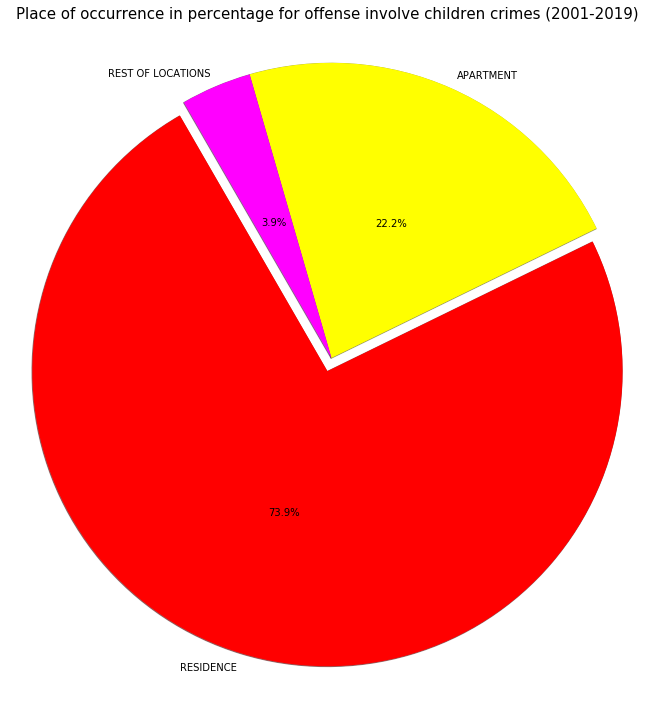

In [843]:
draw_pie_chart_locations(all_involve_children_loc_df,"Place of occurrence in percentage for offense involve children crimes (2001-2019)")

# Find the neighborhoods with the most violent crimes ( 2019 )

In [456]:
homicide_filter_data.head()

,Unnamed: 0,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
28566,28566,HJ374672,05/20/2003 03:15:00 AM,015XX N LASALLE ST,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,True,True,1821,NaN,01A,NaN,NaN,2003,NaN,NaN,NaN
36781,36781,G446123,07/29/2001 10:15:00 AM,011XX N LASALLE ST,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,False,1824,NaN,01A,NaN,NaN,2001,NaN,NaN,NaN
60816,60816,JC113580,01/11/2019 10:30:00 PM,000XX E IDA B WELLS DR,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,111,4.0,01A,NaN,NaN,2019,NaN,NaN,NaN
64265,64265,JC281195,05/27/2019 11:42:00 PM,085XX S CICERO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,834,18.0,01A,1145925.0,1847569.0,2019,41.737710,-87.740958,"(41.737709752, -87.740958098)"
64381,64381,JC281250,05/28/2019 12:25:00 AM,018XX N MONTICELLO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,False,2535,1.0,01A,1151758.0,1911886.0,2019,41.914092,-87.717899,"(41.914092032, -87.717899225)"


From the list above, there are unknow latitude and longitude values but we do have the "Block" information where the approximate location (street names) of the crime. We know the City/Chicago and State/Illinois. So we can geocode the address to get the latitude and longitude values.

In [461]:
homicide_filter_data['Addr'] = homicide_filter_data['Block'].apply(lambda x: ' '.join(x.split()[1:])) + ", CHICAGO, ILLINOIS"
homicide_filter_data = homicide_filter_data.fillna(0)
homicide_filter_data['Loc'] = np.where(homicide_filter_data.Location == 0, homicide_filter_data['Addr'], np.NaN)
homicide_filter_data.head()

,Unnamed: 0,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Addr,Loc
28566,28566,HJ374672,05/20/2003 03:15:00 AM,015XX N LASALLE ST,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,True,True,...,0.0,01A,0.0,0.0,2003,0.000000,0.000000,0,"N LASALLE ST, CHICAGO, ILLINOIS","N LASALLE ST, CHICAGO, ILLINOIS"
36781,36781,G446123,07/29/2001 10:15:00 AM,011XX N LASALLE ST,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,False,...,0.0,01A,0.0,0.0,2001,0.000000,0.000000,0,"N LASALLE ST, CHICAGO, ILLINOIS","N LASALLE ST, CHICAGO, ILLINOIS"
60816,60816,JC113580,01/11/2019 10:30:00 PM,000XX E IDA B WELLS DR,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,4.0,01A,0.0,0.0,2019,0.000000,0.000000,0,"E IDA B WELLS DR, CHICAGO, ILLINOIS","E IDA B WELLS DR, CHICAGO, ILLINOIS"
64265,64265,JC281195,05/27/2019 11:42:00 PM,085XX S CICERO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,18.0,01A,1145925.0,1847569.0,2019,41.737710,-87.740958,"(41.737709752, -87.740958098)","S CICERO AVE, CHICAGO, ILLINOIS",NaN
64381,64381,JC281250,05/28/2019 12:25:00 AM,018XX N MONTICELLO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,False,...,1.0,01A,1151758.0,1911886.0,2019,41.914092,-87.717899,"(41.914092032, -87.717899225)","N MONTICELLO AVE, CHICAGO, ILLINOIS",NaN


Geocoding is an expensive process so we will query only what we need. First clean up the duplicates and known addresses.
We need only unknown Latitude, Longitude that we want to translate.

In [468]:
homicide_addr_forgeocode = homicide_filter_data[['Year','Loc']]
homicide_addr_forgeocode_2019 = homicide_addr_forgeocode[homicide_addr_forgeocode['Year']== 2019]
homicide_addr_forgeocode_2019.head() 
#here NaN means that we already know the Lat, Lon value and we don't need the geocoding

,Year,Loc
60816,2019,"E IDA B WELLS DR, CHICAGO, ILLINOIS"
64265,2019,NaN
64381,2019,NaN
64383,2019,NaN
64490,2019,NaN


In [469]:
homicide_addr_forgeocode_2019 = homicide_addr_forgeocode_2019.rename(columns={'Loc':'Address'})
homicide_addr_forgeocode_2019.drop_duplicates(inplace=True) 
homicide_addr_forgeocode_2019 = homicide_addr_forgeocode_2019.dropna()
homicide_addr_forgeocode_2019.shape

(1, 2)

In [470]:
homicide_addr_forgeocode_2019.head()
#for Homicide data, we only have to geocode 1 address

,Year,Address
60816,2019,"E IDA B WELLS DR, CHICAGO, ILLINOIS"


In [471]:
robbery_filter_data['Addr'] = robbery_filter_data['Block'].apply(lambda x: ' '.join(x.split()[1:])) + ", CHICAGO, ILLINOIS"
robbery_filter_data = robbery_filter_data.fillna(0)
robbery_filter_data['Loc'] = np.where(robbery_filter_data.Location == 0, robbery_filter_data['Addr'], np.NaN)

robbery_addr_forgeocode = robbery_filter_data[['Year','Loc']]
robbery_addr_forgeocode_2019 = robbery_addr_forgeocode[robbery_addr_forgeocode['Year']== 2019]
robbery_addr_forgeocode_2019.shape

(6451, 2)

In [472]:
robbery_addr_forgeocode_2019 = robbery_addr_forgeocode_2019.rename(columns={'Loc':'Address'})
robbery_addr_forgeocode_2019.drop_duplicates(inplace=True) 
robbery_addr_forgeocode_2019 = robbery_addr_forgeocode_2019.dropna()
robbery_addr_forgeocode_2019.shape
#for Robbery data, we only requrie to geocode 4 addresses

(4, 2)

In [473]:
agg_assault_filter_data['Addr'] = agg_assault_filter_data['Block'].apply(lambda x: ' '.join(x.split()[1:])) + ", CHICAGO, ILLINOIS"
agg_assault_filter_data = agg_assault_filter_data.fillna(0)
agg_assault_filter_data['Loc'] = np.where(agg_assault_filter_data.Location == 0, agg_assault_filter_data['Addr'], np.NaN)

agg_assault_addr_forgeocode = agg_assault_filter_data[['Year','Loc']]
agg_assault_addr_forgeocode_2019 = agg_assault_addr_forgeocode[agg_assault_addr_forgeocode['Year']== 2019]
agg_assault_addr_forgeocode_2019.shape

(5074, 2)

In [474]:
agg_assault_addr_forgeocode_2019 = agg_assault_addr_forgeocode_2019.rename(columns={'Loc':'Address'})
agg_assault_addr_forgeocode_2019.drop_duplicates(inplace=True) 
agg_assault_addr_forgeocode_2019 = agg_assault_addr_forgeocode_2019.dropna()
agg_assault_addr_forgeocode_2019.shape
#for Agg assault data, we only requrie to geocode 3 addresses

(3, 2)

In [475]:
assault_sexual_filter_data['Addr'] = assault_sexual_filter_data['Block'].apply(lambda x: ' '.join(x.split()[1:])) + ", CHICAGO, ILLINOIS"
assault_sexual_filter_data = assault_sexual_filter_data.fillna(0)
assault_sexual_filter_data['Loc'] = np.where(assault_sexual_filter_data.Location == 0, assault_sexual_filter_data['Addr'], np.NaN)

assault_sexual_addr_forgeocode = assault_sexual_filter_data[['Year','Loc']]
assault_sexual_addr_forgeocode_2019 = assault_sexual_addr_forgeocode[assault_sexual_addr_forgeocode['Year']== 2019]
assault_sexual_addr_forgeocode_2019.shape

(351, 2)

In [476]:
assault_sexual_addr_forgeocode_2019 = assault_sexual_addr_forgeocode_2019.rename(columns={'Loc':'Address'})
assault_sexual_addr_forgeocode_2019.drop_duplicates(inplace=True) 
assault_sexual_addr_forgeocode_2019 = assault_sexual_addr_forgeocode_2019.dropna()
assault_sexual_addr_forgeocode_2019.shape
#for sexual assault data, we only requrie to geocode 2 addresses

(2, 2)

In [477]:
battery_filter_data['Addr'] = battery_filter_data['Block'].apply(lambda x: ' '.join(x.split()[1:])) + ", CHICAGO, ILLINOIS"
battery_filter_data = battery_filter_data.fillna(0)
battery_filter_data['Loc'] = np.where(battery_filter_data.Location == 0, battery_filter_data['Addr'], np.NaN)

battery_addr_forgeocode = battery_filter_data[['Year','Loc']]
battery_addr_forgeocode_2019 = battery_addr_forgeocode[battery_addr_forgeocode['Year']== 2019]
battery_addr_forgeocode_2019.shape

(7287, 2)

In [478]:
battery_addr_forgeocode_2019 = battery_addr_forgeocode_2019.rename(columns={'Loc':'Address'})
battery_addr_forgeocode_2019.drop_duplicates(inplace=True) 
battery_addr_forgeocode_2019 = battery_addr_forgeocode_2019.dropna()
battery_addr_forgeocode_2019.shape
#for battery data, we only requrie to geocode 2 addresses

(2, 2)

In [481]:
involve_children_filter_data['Addr'] = involve_children_filter_data['Block'].apply(lambda x: ' '.join(x.split()[1:])) + ", CHICAGO, ILLINOIS"
involve_children_filter_data = involve_children_filter_data.fillna(0)
involve_children_filter_data['Loc'] = np.where(involve_children_filter_data.Location == 0, involve_children_filter_data['Addr'], np.NaN)

involve_children_forgeocode = involve_children_filter_data[['Year','Loc']]
involve_children_forgeocode_2019 = involve_children_forgeocode[involve_children_forgeocode['Year']== 2019]
involve_children_forgeocode_2019.shape

(285, 2)

In [482]:
involve_children_forgeocode_2019 = involve_children_forgeocode_2019.rename(columns={'Loc':'Address'})
involve_children_forgeocode_2019.drop_duplicates(inplace=True) 
involve_children_forgeocode_2019 = involve_children_forgeocode_2019.dropna()
involve_children_forgeocode_2019.shape
#for offence involve children data, we don't need to geocode anything.

(0, 2)

In [483]:
homicide_addr_forgeocode_2019.head()

,Year,Address
60816,2019,"E IDA B WELLS DR, CHICAGO, ILLINOIS"


In [485]:
import gmaps
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

geolocator = Nominatim(user_agent="winfproject1")
def converter(x):
    try:
        geocode = RateLimiter(geolocator.geocode, min_delay_seconds=3)
        gloc =geocode(x)
        return "(" + str(gloc.latitude) + "," + str(gloc.longitude) + ")"
    except AttributeError:
        return None  # or some other value

In [486]:
#uncomment this code to run the geocde again
#homicide_addr_forgeocode_2019['LatLon'] = homicide_addr_forgeocode_2019['Address'].apply(lambda x: converter(x))

In [487]:
#after geocode, now we have LatLon value of the address
homicide_addr_forgeocode_2019.head()

,Year,Address,LatLon
60816,2019,"E IDA B WELLS DR, CHICAGO, ILLINOIS","(41.8757047,-87.6270606)"


In [488]:
#save it to a csv file as if we don't need to redo the geocode again next time when we run
#homicide_addr_forgeocode_2019.to_csv('homicide_addr_forgeocode_2019.csv')

In [489]:
#uncomment this code to run the geocde again
#robbery_addr_forgeocode_2019['LatLon'] = robbery_addr_forgeocode_2019['Address'].apply(lambda x: converter(x))

In [490]:
#after geocode, now we have LatLon value of the address
robbery_addr_forgeocode_2019.head()

,Year,Address,LatLon
63583,2019,"W IDA B WELLS DR, CHICAGO, ILLINOIS","(41.875536,-87.6301483)"
186878,2019,"E CERMAK RD, CHICAGO, ILLINOIS","(41.8527723,-87.6260365)"
187312,2019,"E 79TH ST, CHICAGO, ILLINOIS","(41.7511038,-87.6243474)"
188377,2019,"S ASHLAND AVE, CHICAGO, ILLINOIS","(41.7319949,-87.662884)"


In [491]:
#save it to a csv file as if we don't need to redo the geocode again next time when we run
#robbery_addr_forgeocode_2019.to_csv('robbery_addr_forgeocode_2019.csv')

In [492]:
#uncomment this code to run the geocde again
#agg_assault_addr_forgeocode_2019['LatLon'] = agg_assault_addr_forgeocode_2019['Address'].apply(lambda x: converter(x))

In [493]:
#after geocode, now we have LatLon value of the address
agg_assault_addr_forgeocode_2019.head()

,Year,Address,LatLon
102920,2019,"W IDA B WELLS DR, CHICAGO, ILLINOIS","(41.875536,-87.6301483)"
186611,2019,"S HALSTED ST, CHICAGO, ILLINOIS","(41.8388549,-87.6462929)"
188064,2019,"N MILWAUKEE AVE, CHICAGO, ILLINOIS","(41.9967454,-87.7873203)"


In [494]:
#save it to a csv file as if we don't need to redo the geocode again next time when we run
#agg_assault_addr_forgeocode_2019.to_csv('agg_assault_addr_forgeocode_2019.csv')

In [495]:
#uncomment this code to run the geocde again
#assault_sexual_addr_forgeocode_2019['LatLon'] = assault_sexual_addr_forgeocode_2019['Address'].apply(lambda x: converter(x))

In [496]:
#after geocode, now we have LatLon value of the address
assault_sexual_addr_forgeocode_2019.head()

,Year,Address,LatLon
187897,2019,"S SEELEY AVE, CHICAGO, ILLINOIS","(41.7156109,-87.67342)"
188633,2019,"W ROOSEVELT RD, CHICAGO, ILLINOIS","(41.867301,-87.6325483)"


In [497]:
#save it to a csv file as if we don't need to redo the geocode again next time when we run
#assault_sexual_addr_forgeocode_2019.to_csv('assault_sexual_addr_forgeocode_2019.csv')

In [498]:
#uncomment this code to run the geocde again
#battery_addr_forgeocode_2019['LatLon'] = battery_addr_forgeocode_2019['Address'].apply(lambda x: converter(x))

In [499]:
#after geocode, now we have LatLon value of the address
battery_addr_forgeocode_2019.head()

,Year,Address,LatLon
102824,2019,"N CHRISTIANA AVE, CHICAGO, ILLINOIS","(41.9932224,-87.7128515)"
189457,2019,"S LAFAYETTE AVE, CHICAGO, ILLINOIS","(41.7376268,-87.6254754)"


In [500]:
#save it to a csv file as if we don't need to redo the geocode again next time when we run
#battery_addr_forgeocode_2019.to_csv('battery_addr_forgeocode_2019.csv')

Now we have geocoded all the unknown latitude, longitude from the addresses.

In [501]:
homicide_filter_data.head()

,Unnamed: 0,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Addr,Loc
28566,28566,HJ374672,05/20/2003 03:15:00 AM,015XX N LASALLE ST,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,True,True,...,0.0,01A,0.0,0.0,2003,0.000000,0.000000,0,"N LASALLE ST, CHICAGO, ILLINOIS","N LASALLE ST, CHICAGO, ILLINOIS"
36781,36781,G446123,07/29/2001 10:15:00 AM,011XX N LASALLE ST,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,False,...,0.0,01A,0.0,0.0,2001,0.000000,0.000000,0,"N LASALLE ST, CHICAGO, ILLINOIS","N LASALLE ST, CHICAGO, ILLINOIS"
60816,60816,JC113580,01/11/2019 10:30:00 PM,000XX E IDA B WELLS DR,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,4.0,01A,0.0,0.0,2019,0.000000,0.000000,0,"E IDA B WELLS DR, CHICAGO, ILLINOIS","E IDA B WELLS DR, CHICAGO, ILLINOIS"
64265,64265,JC281195,05/27/2019 11:42:00 PM,085XX S CICERO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,18.0,01A,1145925.0,1847569.0,2019,41.737710,-87.740958,"(41.737709752, -87.740958098)","S CICERO AVE, CHICAGO, ILLINOIS",NaN
64381,64381,JC281250,05/28/2019 12:25:00 AM,018XX N MONTICELLO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,False,...,1.0,01A,1151758.0,1911886.0,2019,41.914092,-87.717899,"(41.914092032, -87.717899225)","N MONTICELLO AVE, CHICAGO, ILLINOIS",NaN


In [502]:
homicide_addr_forgeocode_2019.head()

,Year,Address,LatLon
60816,2019,"E IDA B WELLS DR, CHICAGO, ILLINOIS","(41.8757047,-87.6270606)"


In [590]:
homicide_filter_data_2019_df = homicide_filter_data[homicide_filter_data['Year'] == 2019]

In [591]:
homicide_filter_data_2019_df.head()

,Unnamed: 0,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Addr,Loc
60816,60816,JC113580,01/11/2019 10:30:00 PM,000XX E IDA B WELLS DR,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,4.0,01A,0.0,0.0,2019,0.000000,0.000000,0,"E IDA B WELLS DR, CHICAGO, ILLINOIS","E IDA B WELLS DR, CHICAGO, ILLINOIS"
64265,64265,JC281195,05/27/2019 11:42:00 PM,085XX S CICERO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,18.0,01A,1145925.0,1847569.0,2019,41.737710,-87.740958,"(41.737709752, -87.740958098)","S CICERO AVE, CHICAGO, ILLINOIS",NaN
64381,64381,JC281250,05/28/2019 12:25:00 AM,018XX N MONTICELLO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,False,...,1.0,01A,1151758.0,1911886.0,2019,41.914092,-87.717899,"(41.914092032, -87.717899225)","N MONTICELLO AVE, CHICAGO, ILLINOIS",NaN
64383,64383,JC281514,05/28/2019 09:25:00 AM,012XX N MASON AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,29.0,01A,1136467.0,1907694.0,2019,41.902876,-87.774177,"(41.902876025, -87.774176927)","N MASON AVE, CHICAGO, ILLINOIS",NaN
64490,64490,JC283353,05/29/2019 02:24:00 PM,087XX S KINGSTON AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,7.0,01A,1194656.0,1847614.0,2019,41.736774,-87.562421,"(41.736774091, -87.562420599)","S KINGSTON AVE, CHICAGO, ILLINOIS",NaN


In [592]:
def get_latlon_homicide(addr):
    for index, row in homicide_addr_forgeocode_2019.head().iterrows():     
        print(index, row['Address'], row['LatLon'], row['Year'])
        if addr in row['Address']:
            return row['LatLon']

In [593]:
homicide_filter_data_2019_df['Location'] = homicide_filter_data_2019_df.apply(lambda row: get_latlon_homicide(row['Loc']) if row['Location'] == 0 else row['Location'], axis=1)

60816 E IDA B WELLS DR, CHICAGO, ILLINOIS (41.8757047,-87.6270606) 2019


In [594]:
homicide_filter_data_2019_df.head()

,Unnamed: 0,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Addr,Loc
60816,60816,JC113580,01/11/2019 10:30:00 PM,000XX E IDA B WELLS DR,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,4.0,01A,0.0,0.0,2019,0.000000,0.000000,"(41.8757047,-87.6270606)","E IDA B WELLS DR, CHICAGO, ILLINOIS","E IDA B WELLS DR, CHICAGO, ILLINOIS"
64265,64265,JC281195,05/27/2019 11:42:00 PM,085XX S CICERO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,18.0,01A,1145925.0,1847569.0,2019,41.737710,-87.740958,"(41.737709752, -87.740958098)","S CICERO AVE, CHICAGO, ILLINOIS",NaN
64381,64381,JC281250,05/28/2019 12:25:00 AM,018XX N MONTICELLO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,False,...,1.0,01A,1151758.0,1911886.0,2019,41.914092,-87.717899,"(41.914092032, -87.717899225)","N MONTICELLO AVE, CHICAGO, ILLINOIS",NaN
64383,64383,JC281514,05/28/2019 09:25:00 AM,012XX N MASON AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,29.0,01A,1136467.0,1907694.0,2019,41.902876,-87.774177,"(41.902876025, -87.774176927)","N MASON AVE, CHICAGO, ILLINOIS",NaN
64490,64490,JC283353,05/29/2019 02:24:00 PM,087XX S KINGSTON AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,7.0,01A,1194656.0,1847614.0,2019,41.736774,-87.562421,"(41.736774091, -87.562420599)","S KINGSTON AVE, CHICAGO, ILLINOIS",NaN


In [595]:
homicide_filter_data_2019_df['Latitude'] = homicide_filter_data_2019_df.apply(lambda row:row['Location'] if row['Latitude'] == 0 else row['Latitude'], axis=1)

In [596]:
homicide_filter_data_2019_df['Longitude'] = homicide_filter_data_2019_df.apply(lambda row:row['Location'] if row['Longitude'] == 0 else row['Longitude'], axis=1)

In [597]:
homicide_filter_data_2019_df['Latitude'] = homicide_filter_data_2019_df['Location'].str.extract('.*\((.*)\,.*', expand=True)
homicide_filter_data_2019_df['Longitude'] = homicide_filter_data_2019_df['Location'].str.extract('.*\,(.*)\).*', expand=True)

In [598]:
homicide_filter_data_2019_df.head()

,Unnamed: 0,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location,Addr,Loc
60816,60816,JC113580,01/11/2019 10:30:00 PM,000XX E IDA B WELLS DR,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,4.0,01A,0.0,0.0,2019,41.8757047,-87.6270606,"(41.8757047,-87.6270606)","E IDA B WELLS DR, CHICAGO, ILLINOIS","E IDA B WELLS DR, CHICAGO, ILLINOIS"
64265,64265,JC281195,05/27/2019 11:42:00 PM,085XX S CICERO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,18.0,01A,1145925.0,1847569.0,2019,41.737709752,-87.740958098,"(41.737709752, -87.740958098)","S CICERO AVE, CHICAGO, ILLINOIS",NaN
64381,64381,JC281250,05/28/2019 12:25:00 AM,018XX N MONTICELLO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,False,...,1.0,01A,1151758.0,1911886.0,2019,41.914092032,-87.717899225,"(41.914092032, -87.717899225)","N MONTICELLO AVE, CHICAGO, ILLINOIS",NaN
64383,64383,JC281514,05/28/2019 09:25:00 AM,012XX N MASON AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,29.0,01A,1136467.0,1907694.0,2019,41.902876025,-87.774176927,"(41.902876025, -87.774176927)","N MASON AVE, CHICAGO, ILLINOIS",NaN
64490,64490,JC283353,05/29/2019 02:24:00 PM,087XX S KINGSTON AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,7.0,01A,1194656.0,1847614.0,2019,41.736774091,-87.562420599,"(41.736774091, -87.562420599)","S KINGSTON AVE, CHICAGO, ILLINOIS",NaN


In [599]:
homicide_filter_data_2019_df = homicide_filter_data_2019_df[['Latitude','Longitude']]
homicide_filter_data_2019_df.head()

,Latitude,Longitude
60816,41.8757047,-87.6270606
64265,41.737709752,-87.740958098
64381,41.914092032,-87.717899225
64383,41.902876025,-87.774176927
64490,41.736774091,-87.562420599


In [600]:
homicide_filter_data_2019_df.isnull().sum()

Latitude     0
Longitude    0
dtype: int64

In [569]:
def get_latlon_robbery(addr):
    for index, row in robbery_addr_forgeocode_2019.head().iterrows():     
        #print(index, row['Address'], row['LatLon'], row['Year'])
        if addr in row['Address']:
            return row['LatLon']

In [933]:
robbery_filter_data_2019_df = robbery_filter_data[robbery_filter_data['Year'] == 2019]
robbery_filter_data_2019_df['Location'] = robbery_filter_data_2019_df.apply(lambda row: get_latlon_robbery(row['Loc']) if row['Location'] == 0 else row['Location'], axis=1)
robbery_filter_data_2019_df['Latitude'] = robbery_filter_data_2019_df.apply(lambda row:row['Location'] if row['Latitude'] == 0 else row['Latitude'], axis=1)
robbery_filter_data_2019_df['Longitude'] = robbery_filter_data_2019_df.apply(lambda row:row['Location'] if row['Longitude'] == 0 else row['Longitude'], axis=1)
robbery_filter_data_2019_df['Latitude'] = robbery_filter_data_2019_df['Location'].str.extract('.*\((.*)\,.*', expand=True)
robbery_filter_data_2019_df['Longitude'] = robbery_filter_data_2019_df['Location'].str.extract('.*\,(.*)\).*', expand=True)

In [934]:
robbery_filter_data_2019_df = robbery_filter_data_2019_df[['Latitude','Longitude']]
robbery_filter_data_2019_df.head()

,Latitude,Longitude
63583,41.875536,-87.6301483
64130,41.852868298,-87.63091491
64141,41.896669722,-87.628760228
64154,41.751423014,-87.676816181
64248,41.922593816,-87.772020556


In [ ]:
def get_latlon_agg_assault(addr):
    for index, row in agg_assault_addr_forgeocode_2019.head().iterrows():     
        #print(index, row['Address'], row['LatLon'], row['Year'])
        if addr in row['Address']:
            return row['LatLon']

In [572]:
agg_assault_filter_data_2019_df = agg_assault_filter_data[agg_assault_filter_data['Year'] == 2019]
agg_assault_filter_data_2019_df['Location'] = agg_assault_filter_data_2019_df.apply(lambda row: get_latlon_agg_assault(row['Loc']) if row['Location'] == 0 else row['Location'], axis=1)
agg_assault_filter_data_2019_df['Latitude'] = agg_assault_filter_data_2019_df.apply(lambda row:row['Location'] if row['Latitude'] == 0 else row['Latitude'], axis=1)
agg_assault_filter_data_2019_df['Longitude'] = agg_assault_filter_data_2019_df.apply(lambda row:row['Location'] if row['Longitude'] == 0 else row['Longitude'], axis=1)
agg_assault_filter_data_2019_df['Latitude'] = agg_assault_filter_data_2019_df['Location'].str.extract('.*\((.*)\,.*', expand=True)
agg_assault_filter_data_2019_df['Longitude'] = agg_assault_filter_data_2019_df['Location'].str.extract('.*\,(.*)\).*', expand=True)

In [573]:
agg_assault_filter_data_2019_df = agg_assault_filter_data_2019_df[['Latitude','Longitude']]
agg_assault_filter_data_2019_df.head()

,Latitude,Longitude
63179,41.875590103,-87.633515501
64182,41.792974653,-87.723151723
64186,41.73681344,-87.552802376
64223,41.998048983,-87.709354271
64268,41.871833434,-87.726665048


In [574]:
def get_latlon_assault_sexual(addr):
    for index, row in assault_sexual_addr_forgeocode_2019.head().iterrows():     
        #print(index, row['Address'], row['LatLon'], row['Year'])
        if addr in row['Address']:
            return row['LatLon']

In [575]:
assault_sexual_filter_data_2019_df = assault_sexual_filter_data[assault_sexual_filter_data['Year'] == 2019]
assault_sexual_filter_data_2019_df['Location'] = assault_sexual_filter_data_2019_df.apply(lambda row: get_latlon_assault_sexual(row['Loc']) if row['Location'] == 0 else row['Location'], axis=1)
assault_sexual_filter_data_2019_df['Latitude'] = assault_sexual_filter_data_2019_df.apply(lambda row:row['Location'] if row['Latitude'] == 0 else row['Latitude'], axis=1)
assault_sexual_filter_data_2019_df['Longitude'] = assault_sexual_filter_data_2019_df.apply(lambda row:row['Location'] if row['Longitude'] == 0 else row['Longitude'], axis=1)
assault_sexual_filter_data_2019_df['Latitude'] = assault_sexual_filter_data_2019_df['Location'].str.extract('.*\((.*)\,.*', expand=True)
assault_sexual_filter_data_2019_df['Longitude'] = assault_sexual_filter_data_2019_df['Location'].str.extract('.*\,(.*)\).*', expand=True)

In [576]:
assault_sexual_filter_data_2019_df = assault_sexual_filter_data_2019_df[['Latitude','Longitude']]
assault_sexual_filter_data_2019_df.head()

,Latitude,Longitude
65662,41.892332202,-87.710123499
66010,41.776226663,-87.699410789
66373,41.763087915,-87.572522764
66496,41.858243436,-87.72243989
66655,41.836600771,-87.61677038


In [577]:
def get_latlon_battery(addr):
    for index, row in battery_addr_forgeocode_2019.head().iterrows():     
        #print(index, row['Address'], row['LatLon'], row['Year'])
        if addr in row['Address']:
            return row['LatLon']

In [578]:
battery_filter_data_2019_df = battery_filter_data[battery_filter_data['Year'] == 2019]
battery_filter_data_2019_df['Location'] = battery_filter_data_2019_df.apply(lambda row: get_latlon_battery(row['Loc']) if row['Location'] == 0 else row['Location'], axis=1)
battery_filter_data_2019_df['Latitude'] = battery_filter_data_2019_df.apply(lambda row:row['Location'] if row['Latitude'] == 0 else row['Latitude'], axis=1)
battery_filter_data_2019_df['Longitude'] = battery_filter_data_2019_df.apply(lambda row:row['Location'] if row['Longitude'] == 0 else row['Longitude'], axis=1)
battery_filter_data_2019_df['Latitude'] = battery_filter_data_2019_df['Location'].str.extract('.*\((.*)\,.*', expand=True)
battery_filter_data_2019_df['Longitude'] = battery_filter_data_2019_df['Location'].str.extract('.*\,(.*)\).*', expand=True)

In [579]:
battery_filter_data_2019_df = battery_filter_data_2019_df[['Latitude','Longitude']]
battery_filter_data_2019_df.head()

,Latitude,Longitude
64053,41.87229779,-87.627812641
64114,41.809519024,-87.607384952
64131,41.771016576,-87.622724617
64240,41.809314925,-87.620808615
64243,41.879292799,-87.741484659


In [580]:
def get_latlon_involve_children(addr):
    for index, row in involve_children_forgeocode_2019.head().iterrows():     
        #print(index, row['Address'], row['LatLon'], row['Year'])
        if addr in row['Address']:
            return row['LatLon']

In [581]:
involve_children_filter_data_2019_df = involve_children_filter_data[involve_children_filter_data['Year'] == 2019]
involve_children_filter_data_2019_df['Location'] = involve_children_filter_data_2019_df.apply(lambda row: get_latlon_involve_children(row['Loc']) if row['Location'] == 0 else row['Location'], axis=1)
involve_children_filter_data_2019_df['Latitude'] = involve_children_filter_data_2019_df.apply(lambda row:row['Location'] if row['Latitude'] == 0 else row['Latitude'], axis=1)
involve_children_filter_data_2019_df['Longitude'] = involve_children_filter_data_2019_df.apply(lambda row:row['Location'] if row['Longitude'] == 0 else row['Longitude'], axis=1)
involve_children_filter_data_2019_df['Latitude'] = involve_children_filter_data_2019_df['Location'].str.extract('.*\((.*)\,.*', expand=True)
involve_children_filter_data_2019_df['Longitude'] = involve_children_filter_data_2019_df['Location'].str.extract('.*\,(.*)\).*', expand=True)

In [582]:
involve_children_filter_data_2019_df = involve_children_filter_data_2019_df[['Latitude','Longitude']]
involve_children_filter_data_2019_df.head()

,Latitude,Longitude
63449,41.884865037,-87.755230327
64226,41.75409183,-87.623061596
64694,41.782708931,-87.765571862
64695,41.782708931,-87.765571862
65153,41.814760322,-87.693179922


Now we get all the latitude and longitude data, prepare to draw maps.

In [605]:
# First two arugments are the geogrphical coordinates .i.e. Latitude and Longitude and the zoom resolution.
#https://jupyter-gmaps.readthedocs.io/en/latest/tutorial.html#heatmaps
chicago_coordinates = (41.8781, -87.6298)
figure_layout = {'width': '800px', 
                 'height': '500px',
                 'margin': '0 auto 0 auto'}

#google map API key is confidential.
#remove it before sharing with other people..
#replace it with your own API key
#uncomment this and replace it with valid API key
#gmaps.configure(api_key="AI------------------") # Google API key

Download the geojson file from
https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Neighborhoods/bbvz-uum9

In [614]:
with open('Boundaries - Neighborhoods.geojson') as f:
    chicago_geojson = json.load(f)    

In [615]:
#need a float type for drawing on the maps
homicide_filter_data_2019_df = homicide_filter_data_2019_df.rename(columns={'Latitude':'latitude'})
homicide_filter_data_2019_df = homicide_filter_data_2019_df.rename(columns={'Longitude':'longitude'})
homicide_filter_data_2019_df['latitude'] = homicide_filter_data_2019_df['latitude'].astype('float64')
homicide_filter_data_2019_df['longitude'] = homicide_filter_data_2019_df['longitude'].astype('float64')

In [616]:
fig = gmaps.figure(layout=figure_layout, center=chicago_coordinates, zoom_level=10)
heatmap_layer = gmaps.heatmap_layer(homicide_filter_data_2019_df)
geo_layer = gmaps.geojson_layer(chicago_geojson)
fig.add_layer(geo_layer)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='500px', margin='0 auto 0 auto', width='800px'))

In [939]:
#need a float type for drawing on the maps
robbery_filter_data_2019_df = robbery_filter_data_2019_df.rename(columns={'Latitude':'latitude'})
robbery_filter_data_2019_df = robbery_filter_data_2019_df.rename(columns={'Longitude':'longitude'})
robbery_filter_data_2019_df['latitude'] = robbery_filter_data_2019_df['latitude'].astype('float64')
robbery_filter_data_2019_df['longitude'] = robbery_filter_data_2019_df['longitude'].astype('float64')

In [858]:
#!jupyter nbextension list

Known nbextensions:
  config dir: C:\Users\Win\.jupyter\nbconfig
    notebook section
      jupyter-gmaps/extension enabled 
  config dir: C:\Anaconda3\etc\jupyter\nbconfig
    notebook section
      jupyter-js-widgets/extension enabled 


      - Validating: ok
      - Validating: ok


In [859]:
#!jupyter nbextension enable --py --sys-prefix widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [862]:
#import ipywidgets
#from ipywidgets.embed import embed_minimal_html

#html_header = ipywidgets.HTML('<h1>Map 1</h1>')
fig = gmaps.figure(layout=figure_layout, center=chicago_coordinates, zoom_level=10)
heatmap_layer = gmaps.heatmap_layer(robbery_filter_data_2019_df)
geo_layer = gmaps.geojson_layer(chicago_geojson)
fig.add_layer(geo_layer)
fig.add_layer(heatmap_layer)
fig
#outer_box = ipywidgets.VBox([html_header, fig])

#embed_minimal_html(r'robbery_map1.html', views=[fig])
#import IPython
#IPython.display.HTML(filename=r'robbery_map1.html')

Figure(layout=FigureLayout(height='500px', margin='0 auto 0 auto', width='800px'))

In [624]:
#need a float type for drawing on the maps
agg_assault_filter_data_2019_df = agg_assault_filter_data_2019_df.dropna()
agg_assault_filter_data_2019_df = agg_assault_filter_data_2019_df.rename(columns={'Latitude':'latitude'})
agg_assault_filter_data_2019_df = agg_assault_filter_data_2019_df.rename(columns={'Longitude':'longitude'})
agg_assault_filter_data_2019_df['latitude'] = agg_assault_filter_data_2019_df['latitude'].astype('float64')
agg_assault_filter_data_2019_df['longitude'] = agg_assault_filter_data_2019_df['longitude'].astype('float64')

In [625]:
fig = gmaps.figure(layout=figure_layout, center=chicago_coordinates, zoom_level=10)
heatmap_layer = gmaps.heatmap_layer(agg_assault_filter_data_2019_df)
geo_layer = gmaps.geojson_layer(chicago_geojson)
fig.add_layer(geo_layer)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='500px', margin='0 auto 0 auto', width='800px'))

In [626]:
#need a float type for drawing on the maps
assault_sexual_filter_data_2019_df = assault_sexual_filter_data_2019_df.rename(columns={'Latitude':'latitude'})
assault_sexual_filter_data_2019_df = assault_sexual_filter_data_2019_df.rename(columns={'Longitude':'longitude'})
assault_sexual_filter_data_2019_df['latitude'] = assault_sexual_filter_data_2019_df['latitude'].astype('float64')
assault_sexual_filter_data_2019_df['longitude'] = assault_sexual_filter_data_2019_df['longitude'].astype('float64')

In [627]:
fig = gmaps.figure(layout=figure_layout, center=chicago_coordinates, zoom_level=10)
heatmap_layer = gmaps.heatmap_layer(assault_sexual_filter_data_2019_df)
geo_layer = gmaps.geojson_layer(chicago_geojson)
fig.add_layer(geo_layer)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='500px', margin='0 auto 0 auto', width='800px'))

In [628]:
#need a float type for drawing on the maps
battery_filter_data_2019_df = battery_filter_data_2019_df.rename(columns={'Latitude':'latitude'})
battery_filter_data_2019_df = battery_filter_data_2019_df.rename(columns={'Longitude':'longitude'})
battery_filter_data_2019_df['latitude'] = battery_filter_data_2019_df['latitude'].astype('float64')
battery_filter_data_2019_df['longitude'] = battery_filter_data_2019_df['longitude'].astype('float64')

In [629]:
fig = gmaps.figure(layout=figure_layout, center=chicago_coordinates, zoom_level=10)
heatmap_layer = gmaps.heatmap_layer(assault_sexual_filter_data_2019_df)
geo_layer = gmaps.geojson_layer(chicago_geojson)
fig.add_layer(geo_layer)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='500px', margin='0 auto 0 auto', width='800px'))

In [630]:
#need a float type for drawing on the maps
involve_children_filter_data_2019_df = involve_children_filter_data_2019_df.rename(columns={'Latitude':'latitude'})
involve_children_filter_data_2019_df = involve_children_filter_data_2019_df.rename(columns={'Longitude':'longitude'})
involve_children_filter_data_2019_df['latitude'] = involve_children_filter_data_2019_df['latitude'].astype('float64')
involve_children_filter_data_2019_df['longitude'] = involve_children_filter_data_2019_df['longitude'].astype('float64')

In [631]:
fig = gmaps.figure(layout=figure_layout, center=chicago_coordinates, zoom_level=10)
heatmap_layer = gmaps.heatmap_layer(involve_children_filter_data_2019_df)
geo_layer = gmaps.geojson_layer(chicago_geojson)
fig.add_layer(geo_layer)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='500px', margin='0 auto 0 auto', width='800px'))

Now get the neighbourhoods in Chicago from the GeoJSON data.

In [673]:
neighbourhoods = []

#loop through the array of geojson
for i in range(len(chicago_geojson['features'])):
    each_feature = chicago_geojson['features'][i]
    neighbourhoods.append(each_feature['properties']['pri_neigh'])
       
total_neighbourhoods = len(neighbourhoods)

Below are all the neighbourhoods in Chicago.

In [634]:
neighbourhoods

['Grand Boulevard',
 'Printers Row',
 'United Center',
 'Sheffield & DePaul',
 'Humboldt Park',
 'Garfield Park',
 'North Lawndale',
 'Little Village',
 'Armour Square',
 'Avalon Park',
 'Burnside',
 'Hermosa',
 'Avondale',
 'Logan Square',
 'Calumet Heights',
 'East Side',
 'West Pullman',
 'Garfield Ridge',
 'New City',
 'Englewood',
 'Grand Crossing',
 'Ashburn',
 'Mount Greenwood',
 'Morgan Park',
 "O'Hare",
 'Jackson Park',
 'Loop',
 'Pullman',
 'Riverdale',
 'Hegewisch',
 'Greektown',
 'Douglas',
 'Museum Campus',
 'Edgewater',
 'Lake View',
 'Lincoln Park',
 'Magnificent Mile',
 'Lincoln Square',
 'Oakland',
 'Grant Park',
 'West Loop',
 'Fuller Park',
 'Andersonville',
 'Woodlawn',
 'Portage Park',
 'Rush & Division',
 'Little Italy, UIC',
 'Kenwood',
 'Rogers Park',
 'Jefferson Park',
 'Sauganash,Forest Glen',
 'North Park',
 'Albany Park',
 'Irving Park',
 'Dunning',
 'West Ridge',
 'Uptown',
 'Norwood Park',
 'Streeterville',
 'South Shore',
 'Chatham',
 'South Chicago',
 'R

In [637]:
#uncomment to install
#!pip install pyshp

#here my python version is 3.7.x so I need cp37 and my windows is 64 bit
#download whl file from https://www.lfd.uci.edu/~gohlke/pythonlibs/#shapely

#uncomment to install
#!pip install Shapely-1.6.4.post2-cp37-cp37m-win_amd64.whl

In [682]:
import shapefile
from shapely.geometry import Point # Point class
from shapely.geometry import shape # shape() is a function to convert geo objects through the interface

In [683]:
#to find the neighborhood name from lat, lon values
#need to find whether the Point(lon,lat) is inside the multipolygon of the neighbourhood geometry
def get_my_neighborhood(lat,lon):
    point = Point(lon,lat)  #Remember this is (lon, lat)!!
    for i in range(len(chicago_geojson['features'])):
        each_feature = chicago_geojson['features'][i]
        polygon = shape(each_feature['geometry'])        
        if polygon.contains(point):
            return each_feature['properties']['pri_neigh']

In [642]:
homicide_filter_data_2019_df['neighborhood'] = homicide_filter_data_2019_df.apply(lambda row: get_my_neighborhood(row['latitude'],row['longitude']), axis=1)
homicide_filter_data_2019_df.head()

,latitude,longitude,neighborhood
60816,41.875705,-87.627061,Loop
64265,41.737710,-87.740958,Ashburn
64381,41.914092,-87.717899,Logan Square
64383,41.902876,-87.774177,Austin
64490,41.736774,-87.562421,South Chicago


In [974]:
robbery_filter_data_2019_df['neighborhood'].unique()

array(['Loop', 'Chinatown', 'Rush & Division', 'Auburn Gresham',
       'Belmont Cragin', 'Avondale', 'Oakland', 'East Village',
       'United Center', 'Garfield Park', 'Wrigleyville', 'Little Village',
       'Humboldt Park', 'South Shore', 'South Chicago', 'Chicago Lawn',
       'Brighton Park', 'West Ridge', 'Washington Heights', 'Douglas',
       'West Pullman', 'Armour Square', 'Sheffield & DePaul', 'Boystown',
       'New City', 'Englewood', 'Chatham', 'Kenwood', 'Gage Park',
       'Wicker Park', 'Garfield Ridge', 'Hyde Park', 'Near South Side',
       'Logan Square', 'Austin', 'Grand Crossing', 'Old Town',
       'West Loop', 'Streeterville', 'Little Italy, UIC', 'River North',
       'Morgan Park', 'Clearing', 'Roseland', 'Galewood', 'Mckinley Park',
       'Ukrainian Village', 'Lower West Side', 'Uptown', 'Irving Park',
       'North Lawndale', 'Rogers Park', 'Riverdale', 'Woodlawn',
       'Gold Coast', 'Montclare', 'Grand Boulevard', 'Lake View',
       'Bridgeport', 'West

In [940]:
robbery_filter_data_2019_df.head()

,latitude,longitude
63583,41.875536,-87.630148
64130,41.852868,-87.630915
64141,41.896670,-87.628760
64154,41.751423,-87.676816
64248,41.922594,-87.772021


In [941]:
robbery_filter_data_2019_df['neighborhood'] = robbery_filter_data_2019_df.apply(lambda row: get_my_neighborhood(row['latitude'],row['longitude']), axis=1)
robbery_filter_data_2019_df.head()

,latitude,longitude,neighborhood
63583,41.875536,-87.630148,Loop
64130,41.852868,-87.630915,Chinatown
64141,41.896670,-87.628760,Rush & Division
64154,41.751423,-87.676816,Auburn Gresham
64248,41.922594,-87.772021,Belmont Cragin


In [644]:
agg_assault_filter_data_2019_df['neighborhood'] = agg_assault_filter_data_2019_df.apply(lambda row: get_my_neighborhood(row['latitude'],row['longitude']), axis=1)
agg_assault_filter_data_2019_df.head()

,latitude,longitude,neighborhood
63179,41.875590,-87.633516,Loop
64182,41.792975,-87.723152,West Elsdon
64186,41.736813,-87.552802,South Chicago
64223,41.998049,-87.709354,West Ridge
64268,41.871833,-87.726665,Garfield Park


In [645]:
assault_sexual_filter_data_2019_df['neighborhood'] = assault_sexual_filter_data_2019_df.apply(lambda row: get_my_neighborhood(row['latitude'],row['longitude']), axis=1)
assault_sexual_filter_data_2019_df.head()

,latitude,longitude,neighborhood
65662,41.892332,-87.710123,Humboldt Park
66010,41.776227,-87.699411,Chicago Lawn
66373,41.763088,-87.572523,South Shore
66496,41.858243,-87.722440,North Lawndale
66655,41.836601,-87.616770,Douglas


In [646]:
battery_filter_data_2019_df['neighborhood'] = battery_filter_data_2019_df.apply(lambda row: get_my_neighborhood(row['latitude'],row['longitude']), axis=1)
battery_filter_data_2019_df.head()

,latitude,longitude,neighborhood
64053,41.872298,-87.627813,Printers Row
64114,41.809519,-87.607385,Grand Boulevard
64131,41.771017,-87.622725,Grand Crossing
64240,41.809315,-87.620809,Grand Boulevard
64243,41.879293,-87.741485,Austin


In [647]:
involve_children_filter_data_2019_df['neighborhood'] = involve_children_filter_data_2019_df.apply(lambda row: get_my_neighborhood(row['latitude'],row['longitude']), axis=1)
involve_children_filter_data_2019_df.head()

,latitude,longitude,neighborhood
63449,41.884865,-87.755230,Austin
64226,41.754092,-87.623062,Grand Crossing
64694,41.782709,-87.765572,Clearing
64695,41.782709,-87.765572,Clearing
65153,41.814760,-87.693180,Brighton Park


Chicago neighbourhoods have sides too. Based on information from
https://en.wikipedia.org/wiki/Community_areas_in_Chicago

In [648]:
central = ['Cabrini–Green',
           'Gold Coast',
           'Goose Island',
           'Magnificent Mile',
            'Old Town',
           'River North',
           'River West',
           'Streeterville',
            'Loop',
            'New Eastside',
            'South Loop',
            'West Loop Gate',
            'Dearborn Park',
            'Printers Row',
            'South Loop',
            'Prairie Avenue Historic District',
            'Near North Side',
            'Loop',
            'Near South Side',
            'Museum Campus',
            'Millenium Park',
            'Grant Park',
            'West Loop']

In [649]:
north_side = ['Horner Park',
            'Roscoe Village',
            'Boystown',
            'Lake View East',
            'Graceland West',
            'South East Ravenswood',
            'Wrigleyville',
            'Old Town Triangle',
            'Park West',
            'Ranch Triangle',
            'Sheffield Neighbors',
            'Wrightwood Neighbors',
            'Belmont Gardens',
            'Chicagos Polish Village',
            'Kosciuszko Park',
            'Belmont Gardens',
            'Bucktown',
            'Kosciuszko Park',
            'Palmer Square',
             'North Center',
            'Lake View',
            'Lincoln Park',
            'Avondale',
            'Logan Square',
             'Sheffield & DePaul',
             'Rush & Division']

In [650]:
far_north_side = ['Rogers Park',
                'East Rogers Park',
                'Arcadia Terrace',
                'Peterson Park',
                'West Rogers Park',
                'Buena Park',
                'Argyle Street',
                'Margate Park',
                'Sheridan Park',
                'Ravenswood',
                'Ravenswood Gardens',
                'Rockwell Crossing',
                'Edison Park',
                'Big Oaks',
                'Old Norwood Park',
                'Oriole Park',
                'Union Ridge',
                'Gladstone Park',
                'Edgebrook',
                'Old Edgebrook',
                'South Edgebrook',
                'Sauganash',
                'Wildwood',
                'Brynford Park',
                'Hollywood Park',
                'Rivers Edge',
                'Sauganash Woods',
                'Mayfair',
                'North Mayfair',
                'Ravenswood Manor',
                'Schorsch Forest View',
                'Andersonville',
                'Edgewater Glen',
                'Edgewater Beach',
                'Magnolia Glen',
                'Lakewood/Balmoral',
                'Rogers Park',
                'West Ridge',
                'Uptown',
                'Lincoln Square',
                'Edison Park',
                'Norwood Park',
                'Jefferson Park',
                'Forest Glen',
                'North Park',
                'Albany Park',
                'O\'Hare',
                'Edgewater',
                 'Sauganash,Forest Glen']

In [651]:
north_west_side = ['Władysławowo',
                    'Six Corners',
                    'Avondale Gardens',
                    'Independence Park',
                    'Kilbourn Park',
                    'Little Cassubia',
                    'Old Irving Park',
                    'West Walker',
                    'The Villa',
                    'Belmont Heights',
                    'Belmont Terrace',
                    'Irving Woods',
                    'Schorsch Village',
                    'Montclare',
                    'Belmont Central',
                    'Hanson Park',
                    'Belmont Gardens',
                    'Kelvyn Park',
                    'Portage Park',
                    'Irving Park',
                    'Dunning',
                    'Montclare',
                    'Belmont Cragin',
                    'Hermosa']

In [652]:
west_side = ['Humboldt Park',
    'East Village',
    'Noble Square',
    'Polish Downtown',
    'Pulaski Park',
    'Smith Park',
    'Ukrainian Village',
    'Wicker Park',
    'Galewood',
    'The Island',
    'Fifth City',
    'Greektown',
    'Little Italy',
    'Tri-Taylor',
    'Lawndale',
    'Homan Square',
    'Douglas Park',
    'Little Village',
    'Heart of Chicago',
    'Heart of Italy',
    'Pilsen',
    'East Pilsen',
    'Humboldt Park',
    'West Town',
    'Austin',
    'West Garfield Park',
    'East Garfield Park',
    'Near West Side',
    'North Lawndale',
    'South Lawndale',
    'Lower West Side',
    'United Center',
    'Garfield Park',
    'Little Italy, UIC']

In [653]:
south_side = ['Chinatown',
        'Wentworth Gardens',
        'Groveland Park',
        'Lake Meadows',
        'the Gap',
        'Prairie Shores',
        'South Commons',
        'Bronzeville',
        'Kenwood',
        'South Kenwood',
        'East Hyde Park',
        'Hyde Park',
        'West Woodlawn',
        'Jackson Park Highlands',
        'Grand Crossing',
        'Parkway Gardens',
        'Park Manor',
        'Armour Square',
        'Douglas',
        'Oakland',
        'Fuller Park',
        'Grand Boulevard',
        'Kenwood',
        'Washington Park',
        'Hyde Park',
        'Woodlawn',
        'South Shore',
        'Bridgeport',
        'Greater Grand Crossing',
        'Jackson Park']

In [654]:
southwest_side =['LeClaire Courts',
                'Sleepy Hollow',
                'Vittum Park',
                'Back of the Yards',
                'Canaryville',
                'Chrysler Village',
                'Ford City',
                'West Lawn',
                'Lithuanian Plaza',
                'Marquette Park',
                'Garfield Ridge',
                'Archer Heights',
                'Brighton Park',
                'Mckinley Park',
                'New City',
                'West Elsdon',
                'Gage Park',
                'Clearing',
                'West Lawn',
                'Chicago Lawn',
                'West Englewood',
                'Englewood']

In [655]:
far_southeast_side = ['East Chatham',
                    'West Chatham',
                    'West Chesterfield',
                    'Avalon Park',
                    'Marynook',
                    'Stony Island Park',
                    'The Bush',
                    'Pill Hill',
                    'Fernwood',
                    'Rosemoor',
                    'Cottage Grove Heights',
                    'London Towne',
                    'Jeffrey Manor',
                    'Trumbull Park',
                    'Altgeld Gardens',
                    'Eden Green',
                    'Golden Gate',
                    'Chatham',
                    'Avalon Park',
                    'South Chicago',
                    'Burnside',
                    'Calumet Heights',
                    'Roseland',
                    'Pullman',
                    'South Deering',
                    'East Side',
                    'West Pullman',
                    'Riverdale',
                    'Hegewisch']

In [656]:
far_southwest_side = ['Beverly View',
        'Mary Crest',
        'Parkview',
        'Scottsdale',
        'Wrightwood',
        'Brainerd',
        'Longwood Manor',
        'Princeton Park',
        'Mount Greenwood Heights',
        'Talleys Corner',
        'Beverly Woods',
        'Kennedy Park',
        'West Morgan Park',
        'Ashburn',
        'Auburn Gresham',
        'Beverly',
        'Washington Heights',
        'Mount Greenwood',
        'Morgan Park']

In [657]:
def get_chicago_side(nhd):
    chicago_side = ""
    #for i in range(len(neighbourhoods)):
        #neighbourhood = neighbourhoods[i]
    if nhd in central:
        #print('central')
        chicago_side = "central"
    elif nhd in north_side:
        #print('north_side')
        chicago_side = "north_side"
    elif nhd in far_north_side:
        #print('far_north_side')
        chicago_side = "far_north_side"
    elif nhd in north_west_side:
        #print('north_west_side')
        chicago_side = "north_west_side"
    elif nhd in west_side:
        #print('west_side')
        chicago_side = "west_side"
    elif nhd in south_side:
        #print('south_side')
        chicago_side = "south_side"
    elif nhd in southwest_side:
        #print('southwest_side')
        chicago_side = "southwest_side"
    elif nhd in far_southeast_side:
        #print('far_southeast_side')
        chicago_side = "far_southeast_side"
    elif nhd in far_southwest_side:
        #print('far_southwest_side')
        chicago_side = "far_southwest_side"
    else:
        print('***********cannot find*****'+ nhd)

    #print('find @'+ nhd + " chicago_side:"+chicago_side)
    return chicago_side

In [693]:
homicide_filter_data_2019_df['sides'] =  homicide_filter_data_2019_df.apply(lambda row: get_chicago_side(row['neighborhood']), axis=1)
robbery_filter_data_2019_df = robbery_filter_data_2019_df.dropna()
agg_assault_filter_data_2019_df = agg_assault_filter_data_2019_df.dropna()
assault_sexual_filter_data_2019_df = assault_sexual_filter_data_2019_df.dropna()
battery_filter_data_2019_df = battery_filter_data_2019_df.dropna()

In [695]:
robbery_filter_data_2019_df['sides'] =  robbery_filter_data_2019_df.apply(lambda row: get_chicago_side(row['neighborhood']), axis=1)

In [696]:
agg_assault_filter_data_2019_df['sides'] =  agg_assault_filter_data_2019_df.apply(lambda row: get_chicago_side(row['neighborhood']), axis=1)

In [697]:
assault_sexual_filter_data_2019_df['sides'] =  assault_sexual_filter_data_2019_df.apply(lambda row: get_chicago_side(row['neighborhood']), axis=1)

In [698]:
battery_filter_data_2019_df['sides'] =  battery_filter_data_2019_df.apply(lambda row: get_chicago_side(row['neighborhood']), axis=1)

In [699]:
involve_children_filter_data_2019_df['sides'] =  involve_children_filter_data_2019_df.apply(lambda row: get_chicago_side(row['neighborhood']), axis=1)

In [700]:
battery_filter_data_2019_df.head()

,latitude,longitude,neighborhood,sides
64053,41.872298,-87.627813,Printers Row,central
64114,41.809519,-87.607385,Grand Boulevard,south_side
64131,41.771017,-87.622725,Grand Crossing,south_side
64240,41.809315,-87.620809,Grand Boulevard,south_side
64243,41.879293,-87.741485,Austin,west_side


In [701]:
homicide_sides_df = homicide_filter_data_2019_df[['sides']]
homicide_sides_df['homicide'] = 1

robbery_sides_df = robbery_filter_data_2019_df[['sides']]
robbery_sides_df['robbery'] = 1

agg_assault_sides_df = agg_assault_filter_data_2019_df[['sides']]
agg_assault_sides_df['agg_assault'] = 1

assault_sexual_sides_df = assault_sexual_filter_data_2019_df[['sides']]
assault_sexual_sides_df['assault_sexual'] = 1

battery_sides_df = battery_filter_data_2019_df[['sides']]
battery_sides_df['battery'] = 1

involve_children_sides_df = involve_children_filter_data_2019_df[['sides']]
involve_children_sides_df['involve_children'] = 1

In [702]:
homicide_sides_df.head()

,sides,homicide
60816,central,1
64265,far_southwest_side,1
64381,north_side,1
64383,west_side,1
64490,far_southeast_side,1


In [703]:
homicide_sides_df= homicide_sides_df.groupby(['sides']).sum()
robbery_sides_df= robbery_sides_df.groupby(['sides']).sum()
agg_assault_sides_df= agg_assault_sides_df.groupby(['sides']).sum()
assault_sexual_sides_df= assault_sexual_sides_df.groupby(['sides']).sum()
battery_sides_df= battery_sides_df.groupby(['sides']).sum()
involve_children_sides_df= involve_children_sides_df.groupby(['sides']).sum()

In [704]:
homicide_sides_df.head()

,homicide
sides,
central,7
far_north_side,6
far_southeast_side,68
far_southwest_side,28
north_side,8


Clustering using k-means to group the Chicago sides with the crime.

In [1006]:
violent_crimes_loc_2019_df = pd.concat( [homicide_sides_df, 
                                               robbery_sides_df, 
                                               agg_assault_sides_df, 
                                               assault_sexual_sides_df, 
                                               battery_sides_df,
                                               involve_children_sides_df
                                              ],axis=1,sort=False).reset_index()

In [1007]:
violent_crimes_loc_2019_df.head()

,sides,homicide,robbery,agg_assault,assault_sexual,battery,involve_children
0,central,7,601,255,25,336,2
1,far_north_side,6,408,338,25,322,19
2,far_southeast_side,68,694,739,45,1097,29
3,far_southwest_side,28,357,382,21,456,25
4,north_side,8,462,217,7,249,9


In [1008]:
violent_crimes_loc_2019_df = violent_crimes_loc_2019_df.dropna()

In [1009]:
violent_crimes_loc_2019_df['sides'].unique()

array(['central', 'far_north_side', 'far_southeast_side',
       'far_southwest_side', 'north_side', 'north_west_side',
       'south_side', 'southwest_side', 'west_side'], dtype=object)

In [1010]:
violent_crimes_loc_df_nosides = violent_crimes_loc_2019_df.drop(['sides'], axis=1)

In [1011]:
# convert all DataFrame columns to the int64 dtype
violent_crimes_loc_df_nosides = violent_crimes_loc_df_nosides.astype(np.float64)

In [1012]:
violent_crimes_loc_df_nosides.head()

,homicide,robbery,agg_assault,assault_sexual,battery,involve_children
0,7.0,601.0,255.0,25.0,336.0,2.0
1,6.0,408.0,338.0,25.0,322.0,19.0
2,68.0,694.0,739.0,45.0,1097.0,29.0
3,28.0,357.0,382.0,21.0,456.0,25.0
4,8.0,462.0,217.0,7.0,249.0,9.0


In [1013]:
violent_crimes_loc_df_nosides.shape

(9, 6)

In [1048]:
X = StandardScaler().fit_transform(violent_crimes_loc_df_nosides)
X

array([[-0.86652913, -0.24607741, -0.87985805, -0.52878827, -0.76027318,
        -1.23802312],
       [-0.8879543 , -0.66554401, -0.64198112, -0.52878827, -0.78278126,
        -0.52859414],
       [ 0.44040629, -0.04395102,  0.50727972,  0.23266684,  0.46320215,
        -0.11128298],
       [-0.41660054, -0.77638752, -0.51587768, -0.68107929, -0.56734671,
        -0.27820744],
       [-0.84510396, -0.5481803 , -0.98876556, -1.21409787, -0.90014486,
        -0.9459053 ],
       [-0.73797811, -1.07849041, -0.93717779, -0.79529756, -0.92586839,
        -0.06955186],
       [ 0.59038249,  0.54721434,  0.49581577,  0.84183093,  0.78313853,
        -0.31993856],
       [ 0.41898112,  0.36247517,  0.8454662 ,  0.46110337,  0.51625693,
         1.72488614],
       [ 2.30439616,  2.44894116,  2.1150985 ,  2.21245013,  2.17381679,
         1.76661726]])

In [1049]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

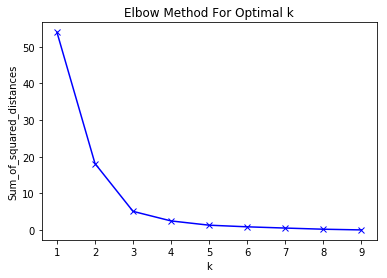

In [1050]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [1051]:
centers = km.cluster_centers_
centers

array([[ 2.30439616,  2.44894116,  2.1150985 ,  2.21245013,  2.17381679,
         1.76661726],
       [-0.8879543 , -0.66554401, -0.64198112, -0.52878827, -0.78278126,
        -0.52859414],
       [ 0.44040629, -0.04395102,  0.50727972,  0.23266684,  0.46320215,
        -0.11128298],
       [ 0.41898112,  0.36247517,  0.8454662 ,  0.46110337,  0.51625693,
         1.72488614],
       [ 0.59038249,  0.54721434,  0.49581577,  0.84183093,  0.78313853,
        -0.31993856],
       [-0.86652913, -0.24607741, -0.87985805, -0.52878827, -0.76027318,
        -1.23802312],
       [-0.84510396, -0.5481803 , -0.98876556, -1.21409787, -0.90014486,
        -0.9459053 ],
       [-0.73797811, -1.07849041, -0.93717779, -0.79529756, -0.92586839,
        -0.06955186],
       [-0.41660054, -0.77638752, -0.51587768, -0.68107929, -0.56734671,
        -0.27820744]])

In [1052]:
# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans
    
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [1053]:
# Get the cluster centroids
print(kmeans.cluster_centers_)
    
# Get the cluster labels
#print(kmeans.labels_)

[[-0.75083321 -0.66293593 -0.79273204 -0.74961025 -0.78728288 -0.61205637]
 [ 2.30439616  2.44894116  2.1150985   2.21245013  2.17381679  1.76661726]
 [ 0.48325663  0.2885795   0.61618723  0.51186705  0.58753254  0.43122154]]


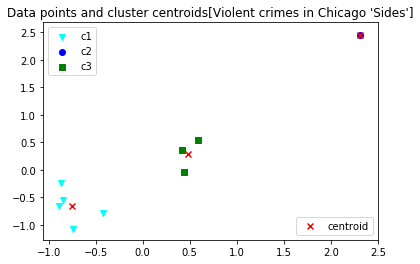

In [1054]:
y_kmeans = kmeans.fit_predict(X)

a1 = plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1],  c='cyan', label ='Cluster 1',marker='v')
a2 = plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1],  c='blue', label ='Cluster 2',marker='o')
a3 = plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1],  c='green', label ='Cluster 3',marker='s')


cr = plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', label = 'Centroids', marker='x')
legend1 = plt.legend([cr],['centroid'],loc='lower right')
plt.legend([a1,a2,a3],['c1','c2','c3'],loc='upper left')


plt.title('Data points and cluster centroids[Violent crimes in Chicago \'Sides\']')
plt.gca().add_artist(legend1)
plt.show()

In [1055]:
result = kmeans.labels_
result

array([0, 0, 2, 0, 0, 0, 2, 2, 1])

In [1056]:
violent_crimes_loc_2019_df['cluster']=result+1
violent_crimes_loc_2019_df.head()

,sides,homicide,robbery,agg_assault,assault_sexual,battery,involve_children,cluster
0,central,7,601,255,25,336,2,1
1,far_north_side,6,408,338,25,322,19,1
2,far_southeast_side,68,694,739,45,1097,29,3
3,far_southwest_side,28,357,382,21,456,25,1
4,north_side,8,462,217,7,249,9,1


In [1057]:
violent_crimes_loc_2019_df['total']= violent_crimes_loc_2019_df[['homicide','robbery','agg_assault','assault_sexual','battery','involve_children']].sum(axis=1)
violent_crimes_loc_2019_df.sort_values(by='total', ascending=False)

,sides,homicide,robbery,agg_assault,assault_sexual,battery,involve_children,cluster,total
8,west_side,155,1841,1300,97,2161,74,2,5628
6,south_side,75,966,735,61,1296,24,3,3157
7,southwest_side,67,881,857,51,1130,73,3,3059
2,far_southeast_side,68,694,739,45,1097,29,3,2672
3,far_southwest_side,28,357,382,21,456,25,1,1269
0,central,7,601,255,25,336,2,1,1226
1,far_north_side,6,408,338,25,322,19,1,1118
4,north_side,8,462,217,7,249,9,1,952
5,north_west_side,13,218,235,18,233,30,1,747


In [1058]:
homicide_nhd_df = homicide_filter_data_2019_df[['neighborhood']]
homicide_nhd_df['homicide'] = 1

robbery_nhd_df = robbery_filter_data_2019_df[['neighborhood']]
robbery_nhd_df['robbery'] = 1

agg_assault_nhd_df = agg_assault_filter_data_2019_df[['neighborhood']]
agg_assault_nhd_df['agg_assault'] = 1

assault_sexual_nhd_df = assault_sexual_filter_data_2019_df[['neighborhood']]
assault_sexual_nhd_df['assault_sexual'] = 1

battery_nhd_df = battery_filter_data_2019_df[['neighborhood']]
battery_nhd_df['battery'] = 1

involve_children_nhd_df = involve_children_filter_data_2019_df[['neighborhood']]
involve_children_nhd_df['involve_children'] = 1

In [1059]:
homicide_nhd_df= homicide_nhd_df.groupby(['neighborhood']).sum()
robbery_nhd_df= robbery_nhd_df.groupby(['neighborhood']).sum()
agg_assault_nhd_df= agg_assault_nhd_df.groupby(['neighborhood']).sum()
assault_sexual_nhd_df= assault_sexual_nhd_df.groupby(['neighborhood']).sum()
battery_nhd_df= battery_nhd_df.groupby(['neighborhood']).sum()
involve_children_nhd_df= involve_children_nhd_df.groupby(['neighborhood']).sum()

In [1060]:
violent_crimes_nhd_2019_df = pd.concat( [homicide_nhd_df, 
                                               robbery_nhd_df, 
                                               agg_assault_nhd_df, 
                                               assault_sexual_nhd_df, 
                                               battery_nhd_df,
                                               involve_children_nhd_df
                                              ],axis=1,sort=False).reset_index()


In [1061]:
violent_crimes_nhd_2019_df.rename(columns={'index':'neighborhood'}, inplace=True)
violent_crimes_nhd_2019_df.head()

,neighborhood,homicide,robbery,agg_assault,assault_sexual,battery,involve_children
0,Albany Park,1.0,67,47,1.0,42,5.0
1,Armour Square,1.0,19,15,NaN,9,1.0
2,Ashburn,4.0,49,41,2.0,35,4.0
3,Auburn Gresham,17.0,204,199,11.0,262,12.0
4,Austin,45.0,473,387,28.0,549,24.0


In [1062]:
violent_crimes_nhd_2019_df = violent_crimes_nhd_2019_df.dropna()
#violent_crimes_nhd_2019_df = violent_crimes_nhd_2019_df.fillna(0)
violent_crimes_loc_2019_df_nonhd = violent_crimes_nhd_2019_df.drop(['neighborhood'], axis=1)
# convert all DataFrame columns to the int64 dtype
violent_crimes_loc_2019_df_nonhd = violent_crimes_loc_2019_df_nonhd.astype(np.float64)
violent_crimes_loc_2019_df_nonhd.head()

,homicide,robbery,agg_assault,assault_sexual,battery,involve_children
0,1.0,67.0,47.0,1.0,42.0,5.0
2,4.0,49.0,41.0,2.0,35.0,4.0
3,17.0,204.0,199.0,11.0,262.0,12.0
4,45.0,473.0,387.0,28.0,549.0,24.0
5,2.0,20.0,27.0,2.0,44.0,1.0


In [1063]:
X = StandardScaler().fit_transform(violent_crimes_loc_2019_df_nonhd)
X

array([[-0.69390834, -0.388212  , -0.470909  , -0.8223455 , -0.62915666,
        -0.04674253],
       [-0.40737877, -0.57299504, -0.54183484, -0.66180793, -0.67906433,
        -0.23760784],
       [ 0.83424935,  1.01819229,  1.32587903,  0.78303018,  0.93936989,
         1.28931468],
       [ 3.5085253 ,  3.77967224,  3.54822212,  3.51216883,  2.98558408,
         3.57969846],
       [-0.59839848, -0.87070106, -0.70732848, -0.66180793, -0.61489733,
        -0.81020379],
       [-0.59839848, -0.35741482, -0.80189627, -0.8223455 , -0.65054566,
        -0.81020379],
       [-0.50288863, -0.01864591, -0.10445881,  0.62249261, -0.20137669,
         1.09844936],
       [-0.69390834, -0.59352649, -0.53001387, -0.66180793, -0.40100735,
         0.52585342],
       [ 0.16568036,  0.85394069,  0.90032397,  0.62249261,  0.61853492,
        -0.42847316],
       [ 0.64322964,  0.730752  ,  0.68754644,  1.26464288,  0.29769994,
         1.86191062],
       [-0.69390834, -0.94256113, -0.76643335, -0.

In [1064]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

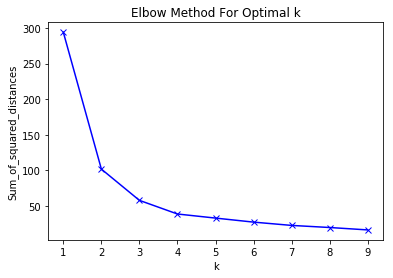

In [1065]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [1066]:
# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans
    
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

In [1067]:
# Get the cluster centroids
print(kmeans.cluster_centers_)
    
# Get the cluster labels
#print(kmeans.labels_)

[[-0.53183101 -0.52726591 -0.53681988 -0.56937721 -0.55137849 -0.46317594]
 [ 1.50281834  1.32616403  1.1772725   1.49398226  1.46085405  0.38952105]
 [ 0.12474757  0.25266253  0.32109625  0.4390211   0.2488108   0.79851815]
 [ 3.07873095  3.17399448  3.61323747  2.6292122   3.11391808  3.4842658 ]]


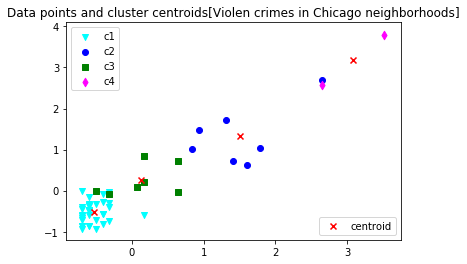

In [1070]:
y_kmeans = kmeans.fit_predict(X)

a1 = plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1],  c='cyan', label ='Cluster 1',marker='v')
a2 = plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1],  c='blue', label ='Cluster 2',marker='o')
a3 = plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1],  c='green', label ='Cluster 3',marker='s')
a4 = plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1],  c='magenta', label ='Cluster 4',marker='d')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', label = 'Centroids', marker='x')
#plt.legend([a1,a2,a3,a4],['c1','c2','c3','c4'])

legend1 = plt.legend([cr],['centroid'],loc='lower right')
plt.legend([a1,a2,a3,a4],['c1','c2','c3','c4'],loc='upper left')
plt.gca().add_artist(legend1)

plt.title('Data points and cluster centroids[Violen crimes in Chicago neighborhoods]')

plt.show()

In [1071]:
result = kmeans.labels_
result

array([0, 0, 1, 3, 0, 0, 2, 0, 2, 2, 0, 0, 3, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 2])

In [1072]:
violent_crimes_nhd_2019_df['cluster']=result + 1
violent_crimes_nhd_2019_df.head()

,neighborhood,homicide,robbery,agg_assault,assault_sexual,battery,involve_children,cluster
0,Albany Park,1.0,67,47,1.0,42,5.0,1
2,Ashburn,4.0,49,41,2.0,35,4.0,1
3,Auburn Gresham,17.0,204,199,11.0,262,12.0,2
4,Austin,45.0,473,387,28.0,549,24.0,4
5,Avalon Park,2.0,20,27,2.0,44,1.0,1


In [1073]:
violent_crimes_nhd_2019_df['total']= violent_crimes_nhd_2019_df[['homicide','robbery','agg_assault','assault_sexual','battery','involve_children']].sum(axis=1)

In [1074]:
violent_crimes_nhd_2019_df.sort_values(by='total', ascending=False, inplace=True)
violent_crimes_nhd_2019_df.head()

,neighborhood,homicide,robbery,agg_assault,assault_sexual,battery,involve_children,cluster,total
4,Austin,45.0,473,387,28.0,549,24.0,4,1506.0
17,Englewood,36.0,355,398,17.0,585,23.0,4,1414.0
20,Garfield Park,36.0,368,197,10.0,500,10.0,2,1121.0
38,North Lawndale,22.0,272,207,17.0,365,9.0,2,892.0
49,South Shore,18.0,248,178,21.0,361,4.0,2,830.0


In [1075]:
violent_crimes_nhd_2019_df['sides'] =  violent_crimes_nhd_2019_df.apply(lambda row: get_chicago_side(row['neighborhood']), axis=1)

In [1076]:
violent_crimes_nhd_2019_df.head(10)

,neighborhood,homicide,robbery,agg_assault,assault_sexual,battery,involve_children,cluster,total,sides
4,Austin,45.0,473,387,28.0,549,24.0,4,1506.0,west_side
17,Englewood,36.0,355,398,17.0,585,23.0,4,1414.0,southwest_side
20,Garfield Park,36.0,368,197,10.0,500,10.0,2,1121.0,west_side
38,North Lawndale,22.0,272,207,17.0,365,9.0,2,892.0,west_side
49,South Shore,18.0,248,178,21.0,361,4.0,2,830.0,south_side
24,Humboldt Park,27.0,205,201,16.0,316,9.0,2,774.0,west_side
3,Auburn Gresham,17.0,204,199,11.0,262,12.0,2,705.0,far_southwest_side
23,Grand Crossing,23.0,176,172,14.0,297,4.0,2,686.0,south_side
46,Roseland,25.0,165,151,19.0,245,3.0,2,608.0,far_southeast_side
10,Chatham,10.0,188,163,10.0,217,3.0,3,591.0,far_southeast_side
